In [256]:
# iphython options
# delete variables in workspace
%reset -f
#places plots inline
%matplotlib inline 
#automatically reloads modules if they are changed
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Watershed Statistics

Adrian Wiegman | arhwiegman.github.io | adrian.wiegman@usda.gov

Created: 2023-04-05 
Edited: 2023-11-06

Buildnotes: 

- Created function for running shapely additive 

----

## MEP Report Data

The objective of this notebook is to evaulate statistical relationships between watershed attributes and water quality monitoring data for the streams monitored by the [Massachusetts Estuaries Program (MEP) Reports ](https://www.mass.gov/guides/the-massachusetts-estuaries-project-and-reports). 

The MEP reports cover 109 watersheds and 96 stream monitoring locations within the MA southcoast, Cape Cod and the Islands of Martha's Vinyard and Nantucket. Each stream was monitored for at least one year. During monitoring, stage was records with a pressure tranducer, low tide stage discharge relationships were developed, and water samples were collected at least weekly and analyzed for NO3-N and TN. Stream monitoring occured between 1999 and 2007, with over half of monitoring occuring between 2003 and 2006. 

The MEP reports compared measured vs modeled discharge and N loads. Modeled discharge estimates based on watershed area and long term recharge rate. Nitrogen loads were modeled using assumptions about atmospheric deposition and attentuation rates for landcover classes, fertilizer use, the number of housing units, residential water use, wastewater treatment plants, and landfills. 

The table below describes the variables in the MEP report summary dataset [(`data/MEP_SummaryData_Coords.csv`)](data/MEP_SummaryData_Coords.csv).

variable | units | description
---|---|---
`Qmod` | m3/d | modeled discharge (cubic meters per day) using recharge rate and watershed area
`Qmeas` | m3/d | measured discharge based on low tide stage data and stage-discharge relationships
`Qdiff` | % | percent difference between Q measured and Q modeled  $100*(Q_{mod} - Q_{meas})/(Q_{meas})$
`NO3` | mg N/L | mean nitrate + nitrite concentration in samples collected stream water from over the monitoring period
`TN`  | mg N/L | mean total nitrogen concentration in samples collected stream water from over the monitoring period
`Atten` |  %   | estimated nitrogen attenuation based $100*(N_{mod} - N_{meas})/(N_{meas})$
`NO32TN` | ratio | NOX divided by TN
`Yr_Start` | yyyy | year of monitoring start
`Yr_End` | yyyy | year of monitoring end
`Lat` | decimal degrees | lattitude WGS84 of monitoring location
`Lon` | decimal degrees | longitude WGS84 of monitoring location
`Region` | character | Region of MEP report 
`MEP` | character | name of MEP report on Mass.gov
`SiteName` | character | Name of stream monitoring site in MEP report
`Region_MEP` | character | unqiue id string: Region > MEP > SiteName

## MEP Watershed Attributes

The watershed boundaries for the MEP datasets for Martha's Vinyard and Cape Cod were obtained from the capecod commision and from Ed Eichner. Watershed attributes are summarized as percent cover for various landcover and soils datasets.within contributing areas to a given monitoring location. Watershed attributes concatenated from the datasource and class value (e.g. `HYDROLGRP_A` is % cover of Hydrologic Soil Group A within contributing subwatersheds). Watershed attributes are described in detail in the file: `Preprocess_Attributes.ipynb`. 

- numeric columns with no prefix summarize all portions of the contributing subwatersheds
- numeric columns with prefix `GT5` reflect land cover in areas above the 5th percentile elevation in contributing subwatersheds 
- numeric columns with prefix `LE5` summarize land cover in areas at or below the 5th percentile elevation in constributing subs. 

## Statistical Analysis

I will use machine learning methods available `scikit-learn 1.2.2` to predict the MEP variables (`NO3`, `TN`, `NO32TN`, `Atten`, `Qmeas`, `Qdiff`) from watershed attributes. My hypotheses are as follows.

1. NOX will increase as (A) measures of human development increase, and (B) as natural areas capable of attenuating NOX decrease.
2. Atten will decrease with declining natural cover
3. NOX2TN will decrease with increasing natural cover

I will apply the following machine learning techniques and evaluate performance using [shuffle and split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html) [k fold cross validation](https://scikit-learn.org/stable/modules/cross_validation.html) with  [root mean squared error]() as the peformance metric:
1. multiple linear regression with regularization to prevent overfitting 
    
    A. [lasso](https://scikit-learn.org/stable/modules/linear_model.html#lasso)
    
    B. [elastic net](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net)
    
2. [random forest regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

3. [gradient boosting regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)


## Bivariate with NO3
COVERNAME_developed open space exponential - positive
COVERNAME impervious - exponential positive
USE residential single family exponential - positive
USE right of way expoential - positive
USE tax exempt - negative inverse
USE ResComMix - positive
SLOPE_D inverse
GT5_Slope_D inverse
Depth to watertable 0 inverse negative
Farmland of unique importance inverse negative
Not prime farmland logistic/exponential positive
Nleaching high logistic/exponential positive
LE5_ hydrol group A negative 

## References

Gu, Q., Hu, H., Ma, L., Sheng, L., Yang, S., Zhang, X., Zhang, M., Zheng, K., & Chen, L. (2019). Characterizing the spatial variations of the relationship between land use and surface water quality using self-organizing map approach. Ecological Indicators, 102(March), 633–643. https://doi.org/10.1016/j.ecolind.2019.03.017

Lee, C. M., Choi, H., Kim, Y., Kim, M. S., Kim, H. K., & Hamm, S. Y. (2021). Characterizing land use effect on shallow groundwater contamination by using self-organizing map and buffer zone. Science of the Total Environment, 800(3), 149632. https://doi.org/10.1016/j.scitotenv.2021.149632

Feng, Z., Xu, C., Zuo, Y., Luo, X., Wang, L., Chen, H., Xie, X., Yan, D., & Liang, T. (2023). Analysis of water quality indexes and their relationships with vegetation using self-organizing map and geographically and temporally weighted regression. Environmental Research, 216(P2), 114587. https://doi.org/10.1016/j.envres.2022.114587


@article{scikit-learn,
 title={Scikit-learn: Machine Learning in {P}ython},
 author={Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V.
         and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P.
         and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and
         Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E.},
 journal={Journal of Machine Learning Research},
 volume={12},
 pages={2825--2830},
 year={2011}
}

In [268]:
# this codeblock sets up the environment from jupyter notebooks
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 12}
plt.rc('font', **font)
import seaborn as sns
import re, os, glob, sys, errno
wdr = os.getcwd() 
print("working directory:",wdr)
idr = os.path.join(wdr,'data')
print("input directory:",idr)
odr = os.path.join(wdr,'outputs')
print("output directory:",odr)
scripts = os.path.join(wdr,'scripts')
print("source codes:",scripts)
sys.path.insert(0,scripts) # insert path to directory containing source codes
from functions import *
print("\ntype `fn`+tab to look up user defined functions, \nrun `??fn_{name}` to inspect function source code\n")
fn_hello('Adrian')
print("\nenvironment setup complete")

working directory: C:\Users\Adrian.Wiegman\Documents\GitHub\Wiegman_USDA_ARS\Cran_Q_C\_superceded\MEP
input directory: C:\Users\Adrian.Wiegman\Documents\GitHub\Wiegman_USDA_ARS\Cran_Q_C\_superceded\MEP\data
output directory: C:\Users\Adrian.Wiegman\Documents\GitHub\Wiegman_USDA_ARS\Cran_Q_C\_superceded\MEP\outputs
source codes: C:\Users\Adrian.Wiegman\Documents\GitHub\Wiegman_USDA_ARS\Cran_Q_C\_superceded\MEP\scripts

type `fn`+tab to look up user defined functions, 
run `??fn_{name}` to inspect function source code

hello Adrian

environment setup complete


In [259]:
# read the subwatershed attributes table
filename = "df_monitoring_point_sub_attributes_terminus.csv"
_ = pd.read_csv(os.path.join(idr,filename))
_ = _.rename(columns=lambda x: re.sub('\.0','',x))
_ = _.rename(columns=lambda x: re.sub('\s','_',x))
_ = _.rename(columns=lambda x: re.sub('-','_',x))
_ = _.rename(columns=lambda x: re.sub(',','_',x))
#_ = _[_.columns.drop(list(_.filter(regex='DEP2')))]
#_ = _[_.columns.drop(list(_.filter(regex='SLOPE_pct')))]
_.replace([np.inf, -np.inf], np.nan, inplace=True)
_.fillna(0,inplace=True)
print(_.info())
for c in _.columns:
    print(c)
df_point_sub_atts = _.drop("FID",axis=1).drop_duplicates()
display(df_point_sub_atts.head())
del _ # clear temporary object from memory


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 592 entries, FID to LE5_Use_Mix
dtypes: float64(590), int64(1), object(1)
memory usage: 462.6+ KB
None
FID
Region_MEP
Lat
Lon
Shape_Area
SLOPE_
SLOPE_0
SLOPE_A
SLOPE_B
SLOPE_C
SLOPE_D
SLOPE_E
FRMLNDCLS_
FRMLNDCLS_All_areas_are_prime_farmland
FRMLNDCLS_Farmland_of_statewide_importance
FRMLNDCLS_Farmland_of_unique_importance
FRMLNDCLS_Not_prime_farmland
HYDROLGRP_
HYDROLGRP_A
HYDROLGRP_A/D
HYDROLGRP_B
HYDROLGRP_B/D
HYDROLGRP_C
HYDROLGRP_C/D
HYDROLGRP_D
HYDRCRATNG_
HYDRCRATNG_No
HYDRCRATNG_Unranked
HYDRCRATNG_Yes
DRAINCLASS_
DRAINCLASS_Excessively_drained
DRAINCLASS_Moderately_well_drained
DRAINCLASS_Poorly_drained
DRAINCLASS_Somewhat_excessively_drained
DRAINCLASS_Somewhat_poorly_drained
DRAINCLASS_Subaqueous
DRAINCLASS_Very_poorly_drained
DRAINCLASS_Well_drained
DEP2WATTBL_0
DEP2WATTBL_5
DEP2WATTBL_8
DEP2WATTBL_10
DEP2WATTBL_15
DEP2WATTBL_23
DEP2WATTBL_29
DEP2WATTBL_30
DEP2WATTBL_38
DEP2WATTBL_45
DEP2WATTBL_

Region_MEP        Lat        Lon  \
0    Buzzards Bay > Acushnet > Acushnet River  41.681859 -70.918844   
4  Buzzards Bay > Westport > Adamsville Brook  41.553741 -71.126612   
5       Buzzards Bay > Wareham > Agawam River  41.762449 -70.676352   
6    Buzzards Bay > Westport > Angeline Brook  41.550479 -71.104556   
7  Buzzards Bay > Slocums > Barneys Joy Creek  41.544199 -71.008317   

     Shape_Area     SLOPE_   SLOPE_0    SLOPE_A    SLOPE_B    SLOPE_C  \
0  4.510600e+07   0.000000  7.346414  40.006569  41.155998   8.742853   
4  1.489267e+07  51.319207  0.620756  21.203183  25.675601   0.913079   
5  5.360519e+07   0.000000  7.680673  11.450151  32.424942  30.415242   
6  8.556921e+06   0.000000  0.117139  45.176960  52.972043   1.733858   
7  2.311634e+06   0.000000  0.044896  41.902816  57.646245   0.406042   

    SLOPE_D  ...  LE5_CRANBERRY_0  LE5_CRANBERRY_1  LE5_ACTIVE_0  \
0  2.561089  ...        97.505928         2.494072     97.505928   
4  0.268174  ...       100.000000         0.000000    100.000000   
5  0.000000  ...        84.501113        10.006754     84.501113   
6  0.000000  ...       100.000000         0.000000    100.000000   
7  0.000000  ...       100.000000         0.000000    100.000000   

   LE5_ACTIVE_1  LE5_HSG_D  LE5_HYDRIC  LE5_NaturalCover  LE5_Use_Res  \
0      2.494072  53.576021   83.413571         93.312538    22.879596   
4      0.000000   1.712729   13.130529         13.727705     6.391487   
5     10.006754  20.227343   19.523828         83.197913    15.501171   
6      0.000000  86.416996   83.302060         97.264979    20.660204   
7      0.000000  35.586717   35.586717         84.170469    91.932226   

   LE5_Use_ResComMix  LE5_Use_Mix  
0          34.147798    11.253295  
4          16.517127     0.000000  
5          34.895658    13.087038  
6          20.660204     0.000000  
7          91.932226     0.000000  

[5 rows x 591 columns]

In [260]:
# read the subwatershed monitoring data table
filename = "MEP_SummaryData_Coords.csv"
_ = pd.read_csv(os.path.join(idr,filename))
_.info()

#print()
_ = _[~_['Region_MEP'].isna()]# remove rows with >50% Null
#print(_.shape)
_.dropna(axis=1, thresh = int(0.5*_.shape[0]), inplace=True) # remove columns with >50% Null
#print(_.info())
_.replace([np.inf, -np.inf], np.nan, inplace=True)
#_.fillna(0,inplace=True)
df_monitoring = _
del _ # clear temporary object from memory

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   idn          109 non-null    int64  
 1   Region_MEP   109 non-null    object 
 2   Region       109 non-null    object 
 3   MEP          109 non-null    object 
 4   SiteName     99 non-null     object 
 5   Lat          98 non-null     object 
 6   Lon          98 non-null     float64
 7   Yr_Start     96 non-null     float64
 8   Yr_End       96 non-null     float64
 9   Dates        96 non-null     object 
 10  Pond_Atten   92 non-null     object 
 11  Qmeas        96 non-null     float64
 12  Qmod         95 non-null     float64
 13  Qdiff        96 non-null     float64
 14  NO3          96 non-null     float64
 15  NH4          16 non-null     object 
 16  TN           96 non-null     float64
 17  NO32TN       96 non-null     float64
 18  Atten        94 non-null     float64
 19  Notes   

In [261]:
# clean up the monitoring data.
#print(df_monitoring.replace(to_replace=r'//', value='', regex=True))
#df_monitoring.rename(columns={'Pond/Stream N Atten. Meas. (%)':'Atten (%)'},inplace=True)
#df_monitoring['Atten (%)'] = pd.to_numeric(df_monitoring['Atten (%)'])
#print(df_monitoring.info())

# add weights of observations based on year of monitoring
df_monitoring['n'] = 1
_ = df_monitoring[["Region_MEP","n"]].dropna().groupby('Region_MEP').aggregate(sum)
df_monitoring.merge(_,on="Region_MEP")
df_monitoring['wt'] = 1/df_monitoring['n']  # make observation wieghts based on monitoring years.
df_monitoring.head()
# select columns to retain for analysis
selected_monitoring_cols = ['NO32TN','TN','Qmeas','Qdiff','NO3','Atten']
grps = ['Region_MEP']

# calculate mean value for all monitoring years at a given station
df_monitoring_avg = df_monitoring.groupby(grps)[selected_monitoring_cols].aggregate(np.mean)
df_monitoring_avg['Yr_Start'] = df_monitoring.groupby(grps)['Yr_Start'].aggregate(np.min)
df_monitoring_avg['Yr_End'] = df_monitoring.groupby(grps)['Yr_End'].aggregate(np.max)
df_monitoring_avg = df_monitoring_avg.assign(Year = (df_monitoring_avg.Yr_Start+df_monitoring_avg['Yr_End'])/2)
df_monitoring_avg = df_monitoring_avg.drop_duplicates()
print(df_monitoring_avg.head())
df_monitoring_avg.info()
df_monitoring_avg.to_csv(os.path.join(odr,"MEP_SummaryData_Coords_Avg.csv"))
df_monitoring_avg.describe().T

                                                    NO32TN      TN    Qmeas  \
Region_MEP                                                                    
Buzzards Bay > Acushnet > Acushnet River          0.536843  1.1145  81039.5   
Buzzards Bay > Nasketucket > Nasketucket River 1  0.741162  1.5840   1989.0   
Buzzards Bay > Nasketucket > Nasketucket River 2  0.361587  1.1090  11532.0   
Buzzards Bay > Nasketucket > Nonquit Brook        0.614440  1.3850   1504.0   
Buzzards Bay > Nasketucket > Shaws Cove Stream    0.250980  1.0200   2875.0   

                                                      Qdiff     NO3  Atten  \
Region_MEP                                                                   
Buzzards Bay > Acushnet > Acushnet River          26.472908  0.5975  23.25   
Buzzards Bay > Nasketucket > Nasketucket River 1   8.094520  1.1740   0.00   
Buzzards Bay > Nasketucket > Nasketucket River 2   0.702393  0.4010  13.00   
Buzzards Bay > Nasketucket > Nonquit Brook         3.989

count          mean           std          min          25%  \
NO32TN     93.0      0.386872      0.218176     0.020376     0.189732   
TN         93.0      0.967849      0.483072     0.258000     0.654000   
Qmeas      93.0  18117.859169  40610.637356    97.000000  1462.000000   
Qdiff      93.0      7.857145     35.379930  -100.000000    -5.573937   
NO3        93.0      0.429402      0.428691     0.013000     0.144000   
Atten      91.0     30.385165     23.646814   -57.000000    12.500000   
Yr_Start   93.0   2003.666667      1.746632  1999.000000  2002.000000   
Yr_End     93.0   2004.784946      1.686580  2000.000000  2004.000000   
Year       93.0   2004.225806      1.704400  1999.500000  2003.500000   

                  50%           75%            max  
NO32TN       0.375472      0.561916       1.000000  
TN           0.874000      1.114500       2.988000  
Qmeas     4050.000000  13966.000000  272703.126000  
Qdiff        1.515781     11.659726     191.676436  
NO3          0.277000      0.543000       2.207000  
Atten       32.000000     51.000000      76.000000  
Yr_Start  2003.000000   2005.000000    2006.000000  
Yr_End    2005.000000   2006.000000    2007.000000  
Year      2004.000000   2005.500000    2006.500000

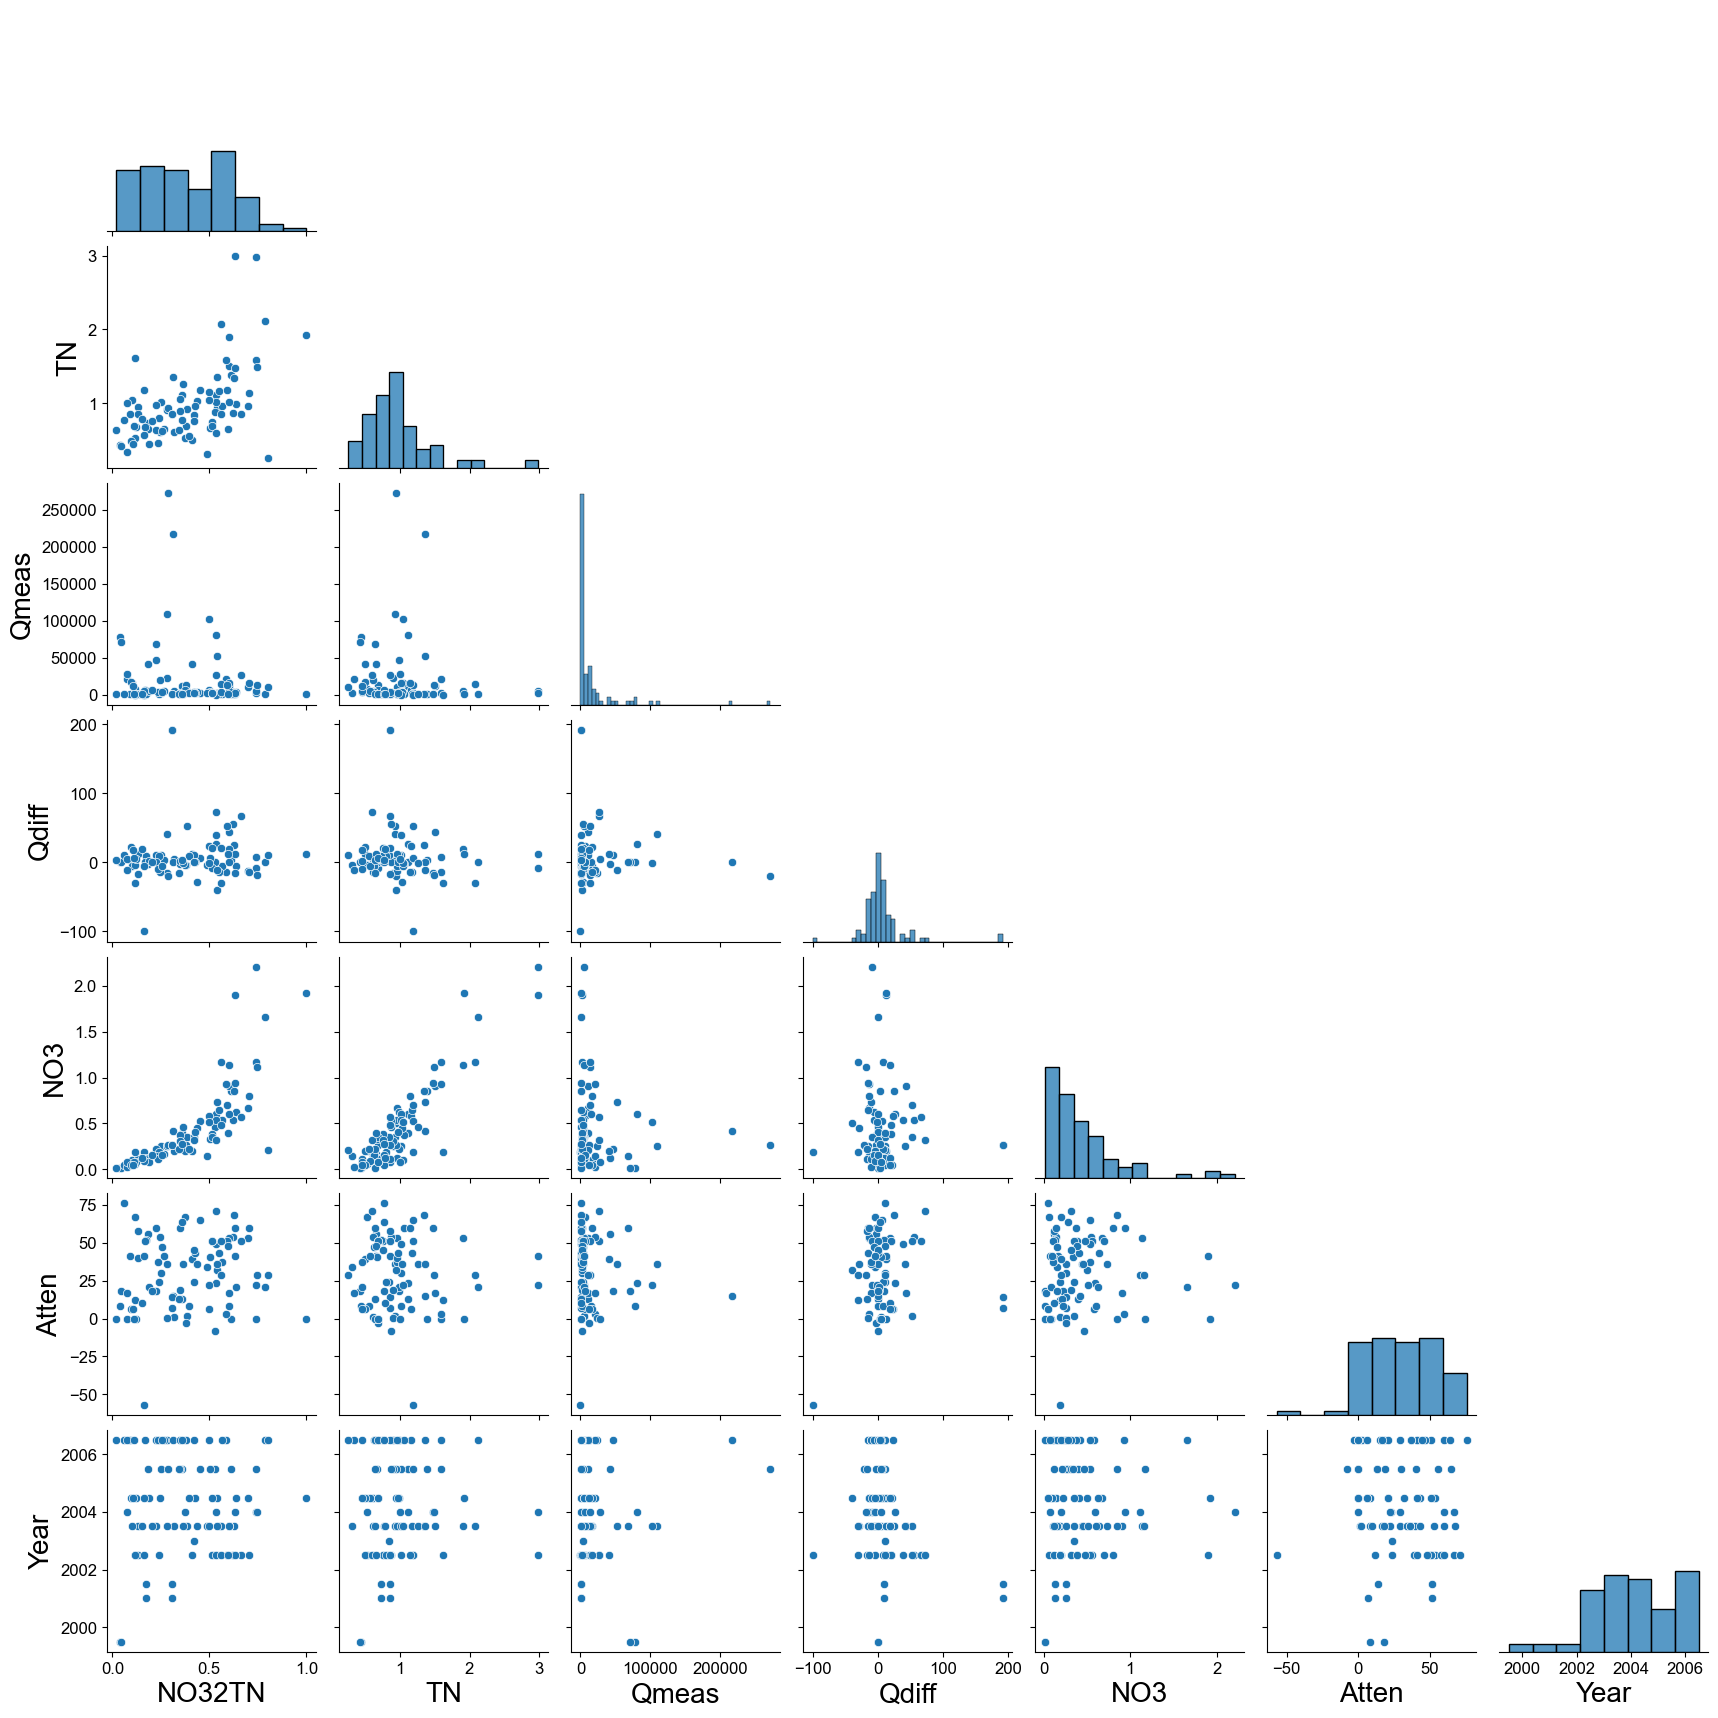

In [269]:
with sns.plotting_context(rc={"axes.labelsize":20}):
    sns.pairplot(df_monitoring_avg.drop(['Yr_Start','Yr_End'],axis=1),
             corner=True) # show only lower triangle

In [263]:
#join the data
df_monitoring_watershed = df_monitoring_avg.merge(df_point_sub_atts,how='left',on="Region_MEP")
df = df_monitoring_watershed # make alias
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(0,inplace=True)
#df.set_index(['Region_MEP'],inplace=True)
df.info()
df.to_csv(os.path.join(odr,'df_MEP_Monitoring_Avg_Geo_Merge.csv'),index=False)
print(df.columns)
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 91
Columns: 600 entries, Region_MEP to LE5_Use_Mix
dtypes: float64(599), object(1)
memory usage: 403.8+ KB
Index(['Region_MEP', 'NO32TN', 'TN', 'Qmeas', 'Qdiff', 'NO3', 'Atten',
       'Yr_Start', 'Yr_End', 'Year',
       ...
       'LE5_CRANBERRY_0', 'LE5_CRANBERRY_1', 'LE5_ACTIVE_0', 'LE5_ACTIVE_1',
       'LE5_HSG_D', 'LE5_HYDRIC', 'LE5_NaturalCover', 'LE5_Use_Res',
       'LE5_Use_ResComMix', 'LE5_Use_Mix'],
      dtype='object', length=600)


Region_MEP    NO32TN      TN  \
0          Buzzards Bay > Acushnet > Acushnet River  0.536843  1.1145   
1  Buzzards Bay > Nasketucket > Nasketucket River 1  0.741162  1.5840   
2  Buzzards Bay > Nasketucket > Nasketucket River 2  0.361587  1.1090   
3        Buzzards Bay > Nasketucket > Nonquit Brook  0.614440  1.3850   
4    Buzzards Bay > Nasketucket > Shaws Cove Stream  0.250980  1.0200   

     Qmeas      Qdiff     NO3  Atten  Yr_Start  Yr_End    Year  ...  \
0  81039.5  26.472908  0.5975  23.25    2002.0  2006.0  2004.0  ...   
1   1989.0   8.094520  1.1740   0.00    2005.0  2006.0  2005.5  ...   
2  11532.0   0.702393  0.4010  13.00    2005.0  2006.0  2005.5  ...   
3   1504.0   3.989362  0.8510   0.00    2005.0  2006.0  2005.5  ...   
4   2875.0  11.026087  0.2560  30.00    2005.0  2006.0  2005.5  ...   

   LE5_CRANBERRY_0  LE5_CRANBERRY_1  LE5_ACTIVE_0  LE5_ACTIVE_1   LE5_HSG_D  \
0        97.505928         2.494072     97.505928      2.494072   53.576021   
1       100.000000         0.000000    100.000000      0.000000   68.097370   
2       100.000000         0.000000    100.000000      0.000000   40.446784   
3       100.000000         0.000000    100.000000      0.000000  100.000002   
4       100.000000         0.000000    100.000000      0.000000   98.085378   

   LE5_HYDRIC  LE5_NaturalCover  LE5_Use_Res  LE5_Use_ResComMix  LE5_Use_Mix  
0   83.413571         93.312538    22.879596          34.147798    11.253295  
1   69.137606         49.882406    29.273768          51.631083     0.000000  
2   64.032529         59.717234    21.834336          31.239810     5.996021  
3   92.090538         99.999998     0.000000           0.000000     0.000000  
4   91.146320         90.945119     0.000000           0.000000     0.000000  

[5 rows x 600 columns]

In [264]:
# univariate analysis
df_summary = df.describe().T
df_summary.to_csv(os.path.join(odr,'df_summary.csv'))
df_summary

count          mean           std         min          25%  \
NO32TN              86.0      0.397288      0.217911    0.020376     0.224347   
TN                  86.0      0.987326      0.494108    0.258000     0.671000   
Qmeas               86.0  15773.043915  31759.366037   97.000000  1368.250000   
Qdiff               86.0      8.182923     36.578803 -100.000000    -5.472575   
NO3                 86.0      0.448819      0.438777    0.013000     0.148500   
...                  ...           ...           ...         ...          ...   
LE5_HYDRIC          86.0     59.977076     29.196030    0.000000    34.309082   
LE5_NaturalCover    86.0     82.772910     24.318725    0.822193    81.914011   
LE5_Use_Res         86.0     24.769460     28.936332    0.000000     2.729531   
LE5_Use_ResComMix   86.0     28.384464     29.205044    0.000000     3.932399   
LE5_Use_Mix         86.0      1.620870      5.349112    0.000000     0.000000   

                           50%           75%            max  
NO32TN                0.384112      0.562535       1.000000  
TN                    0.885000      1.152750       2.988000  
Qmeas              3847.500000  13734.750000  217352.276700  
Qdiff                 1.999098     11.071337     191.676436  
NO3                   0.316000      0.576250       2.207000  
...                        ...           ...            ...  
LE5_HYDRIC           67.936642     83.961279      98.312921  
LE5_NaturalCover     91.763083     98.767609     100.000000  
LE5_Use_Res          11.659114     38.376213      99.949538  
LE5_Use_ResComMix    16.241228     48.604403      99.949538  
LE5_Use_Mix           0.000000      0.002104      38.476977  

[599 rows x 8 columns]

In [265]:
for i in df.index:
    print(i)
    print("index: ",i,"  MEP id: ",df.Region_MEP[i])

0
index:  0   MEP id:  Buzzards Bay > Acushnet > Acushnet River
1
index:  1   MEP id:  Buzzards Bay > Nasketucket > Nasketucket River 1
2
index:  2   MEP id:  Buzzards Bay > Nasketucket > Nasketucket River 2
3
index:  3   MEP id:  Buzzards Bay > Nasketucket > Nonquit Brook
4
index:  4   MEP id:  Buzzards Bay > Nasketucket > Shaws Cove Stream
5
index:  5   MEP id:  Buzzards Bay > Slocums > Barneys Joy Creek
6
index:  6   MEP id:  Buzzards Bay > Slocums > Destruction Brook
7
index:  7   MEP id:  Buzzards Bay > Slocums > Giles Creek
8
index:  8   MEP id:  Buzzards Bay > Slocums > Paskamansett River
9
index:  9   MEP id:  Buzzards Bay > Wareham > Agawam River
10
index:  10   MEP id:  Buzzards Bay > Wareham > Wankinco River
11
index:  11   MEP id:  Buzzards Bay > Westport > Adamsville Brook
12
index:  12   MEP id:  Buzzards Bay > Westport > Angeline Brook
13
index:  13   MEP id:  Buzzards Bay > Westport > Kirby Brook
14
index:  14   MEP id:  Buzzards Bay > Westport > Snell Creek
16
index:  

In [273]:
selected = ['Shape_Area',
            #'HYDRCRATNG_No','HSG_D','HYDRIC',
            'COVERNAME_Water',
            #'SLOPE_0','SLOPE_A',
            'NaturalCover','USEGENNAME_Commercial',
            'CRANBERRY_1',
            #'ACTIVE_1',
            #'NLEACHING_Low',
'COVERNAME_Developed_Open_Space', # positive
'COVERNAME_Impervious', # exponential positive
'USEGENNAME_Residential___single_family', # exponential - positive
'USEGENNAME_Right_of_way', # positive
'USEGENNAME_Tax_exempt', # negative inverse
'Use_ResComMix', # positive
#'SLOPE_D', # inverse, slope D is steep slopes betwee 15-25% grade
#'DEP2WATTBL_0', # inverse negative
#'FRMLNDCLS_Not_prime_farmland', # logistic/exponential positive
#'NLEACHING_High', # logistic/exponential positive
#'HYDROLGRP_A', # negative 
#'Shape_Area'
           ]

selected_le5 = ["LE5_"+i for i in selected]
selected_gt5 = ["GT5_"+i for i in selected]

selected_watershed_features = selected
#selected_watershed_features = selected_le5 + selected_gt5

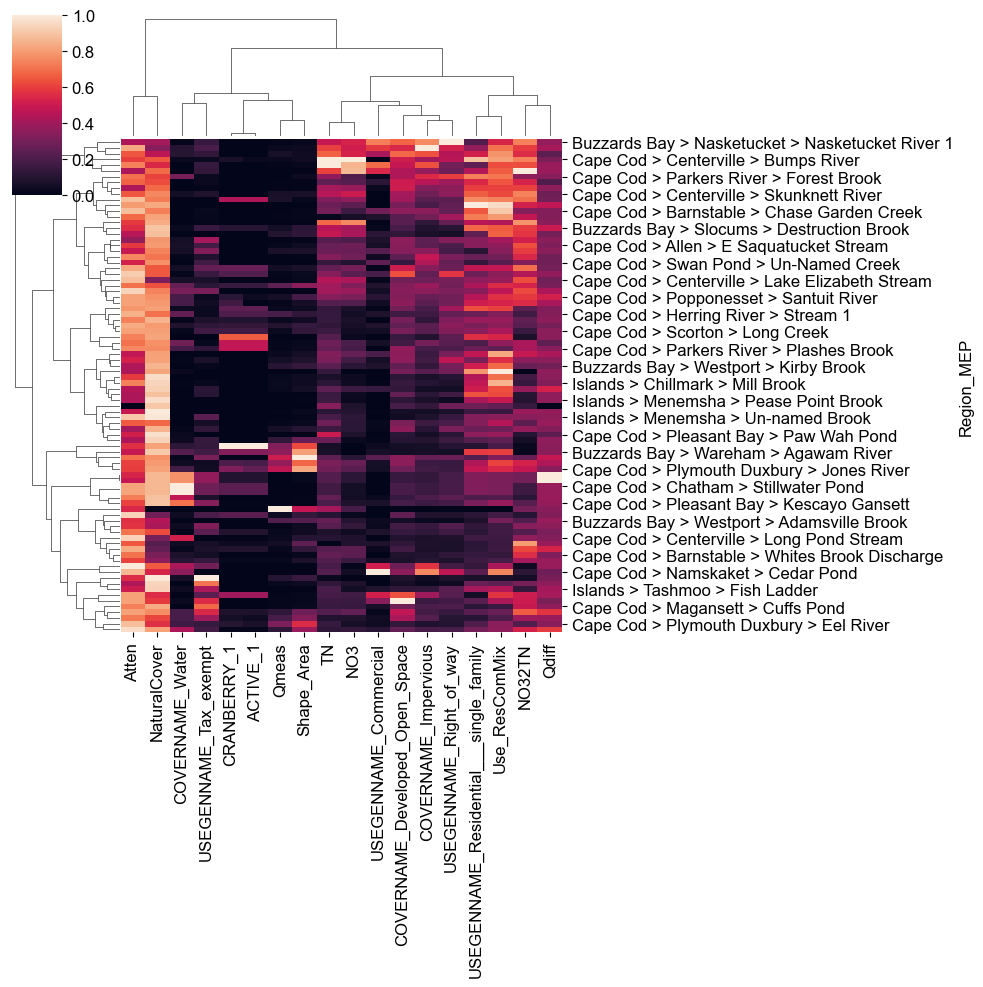

In [270]:
sns.clustermap(df[selected_monitoring_cols+selected_watershed_features].set_index(df['Region_MEP']),standard_scale=1,metric="euclidean",method='ward')

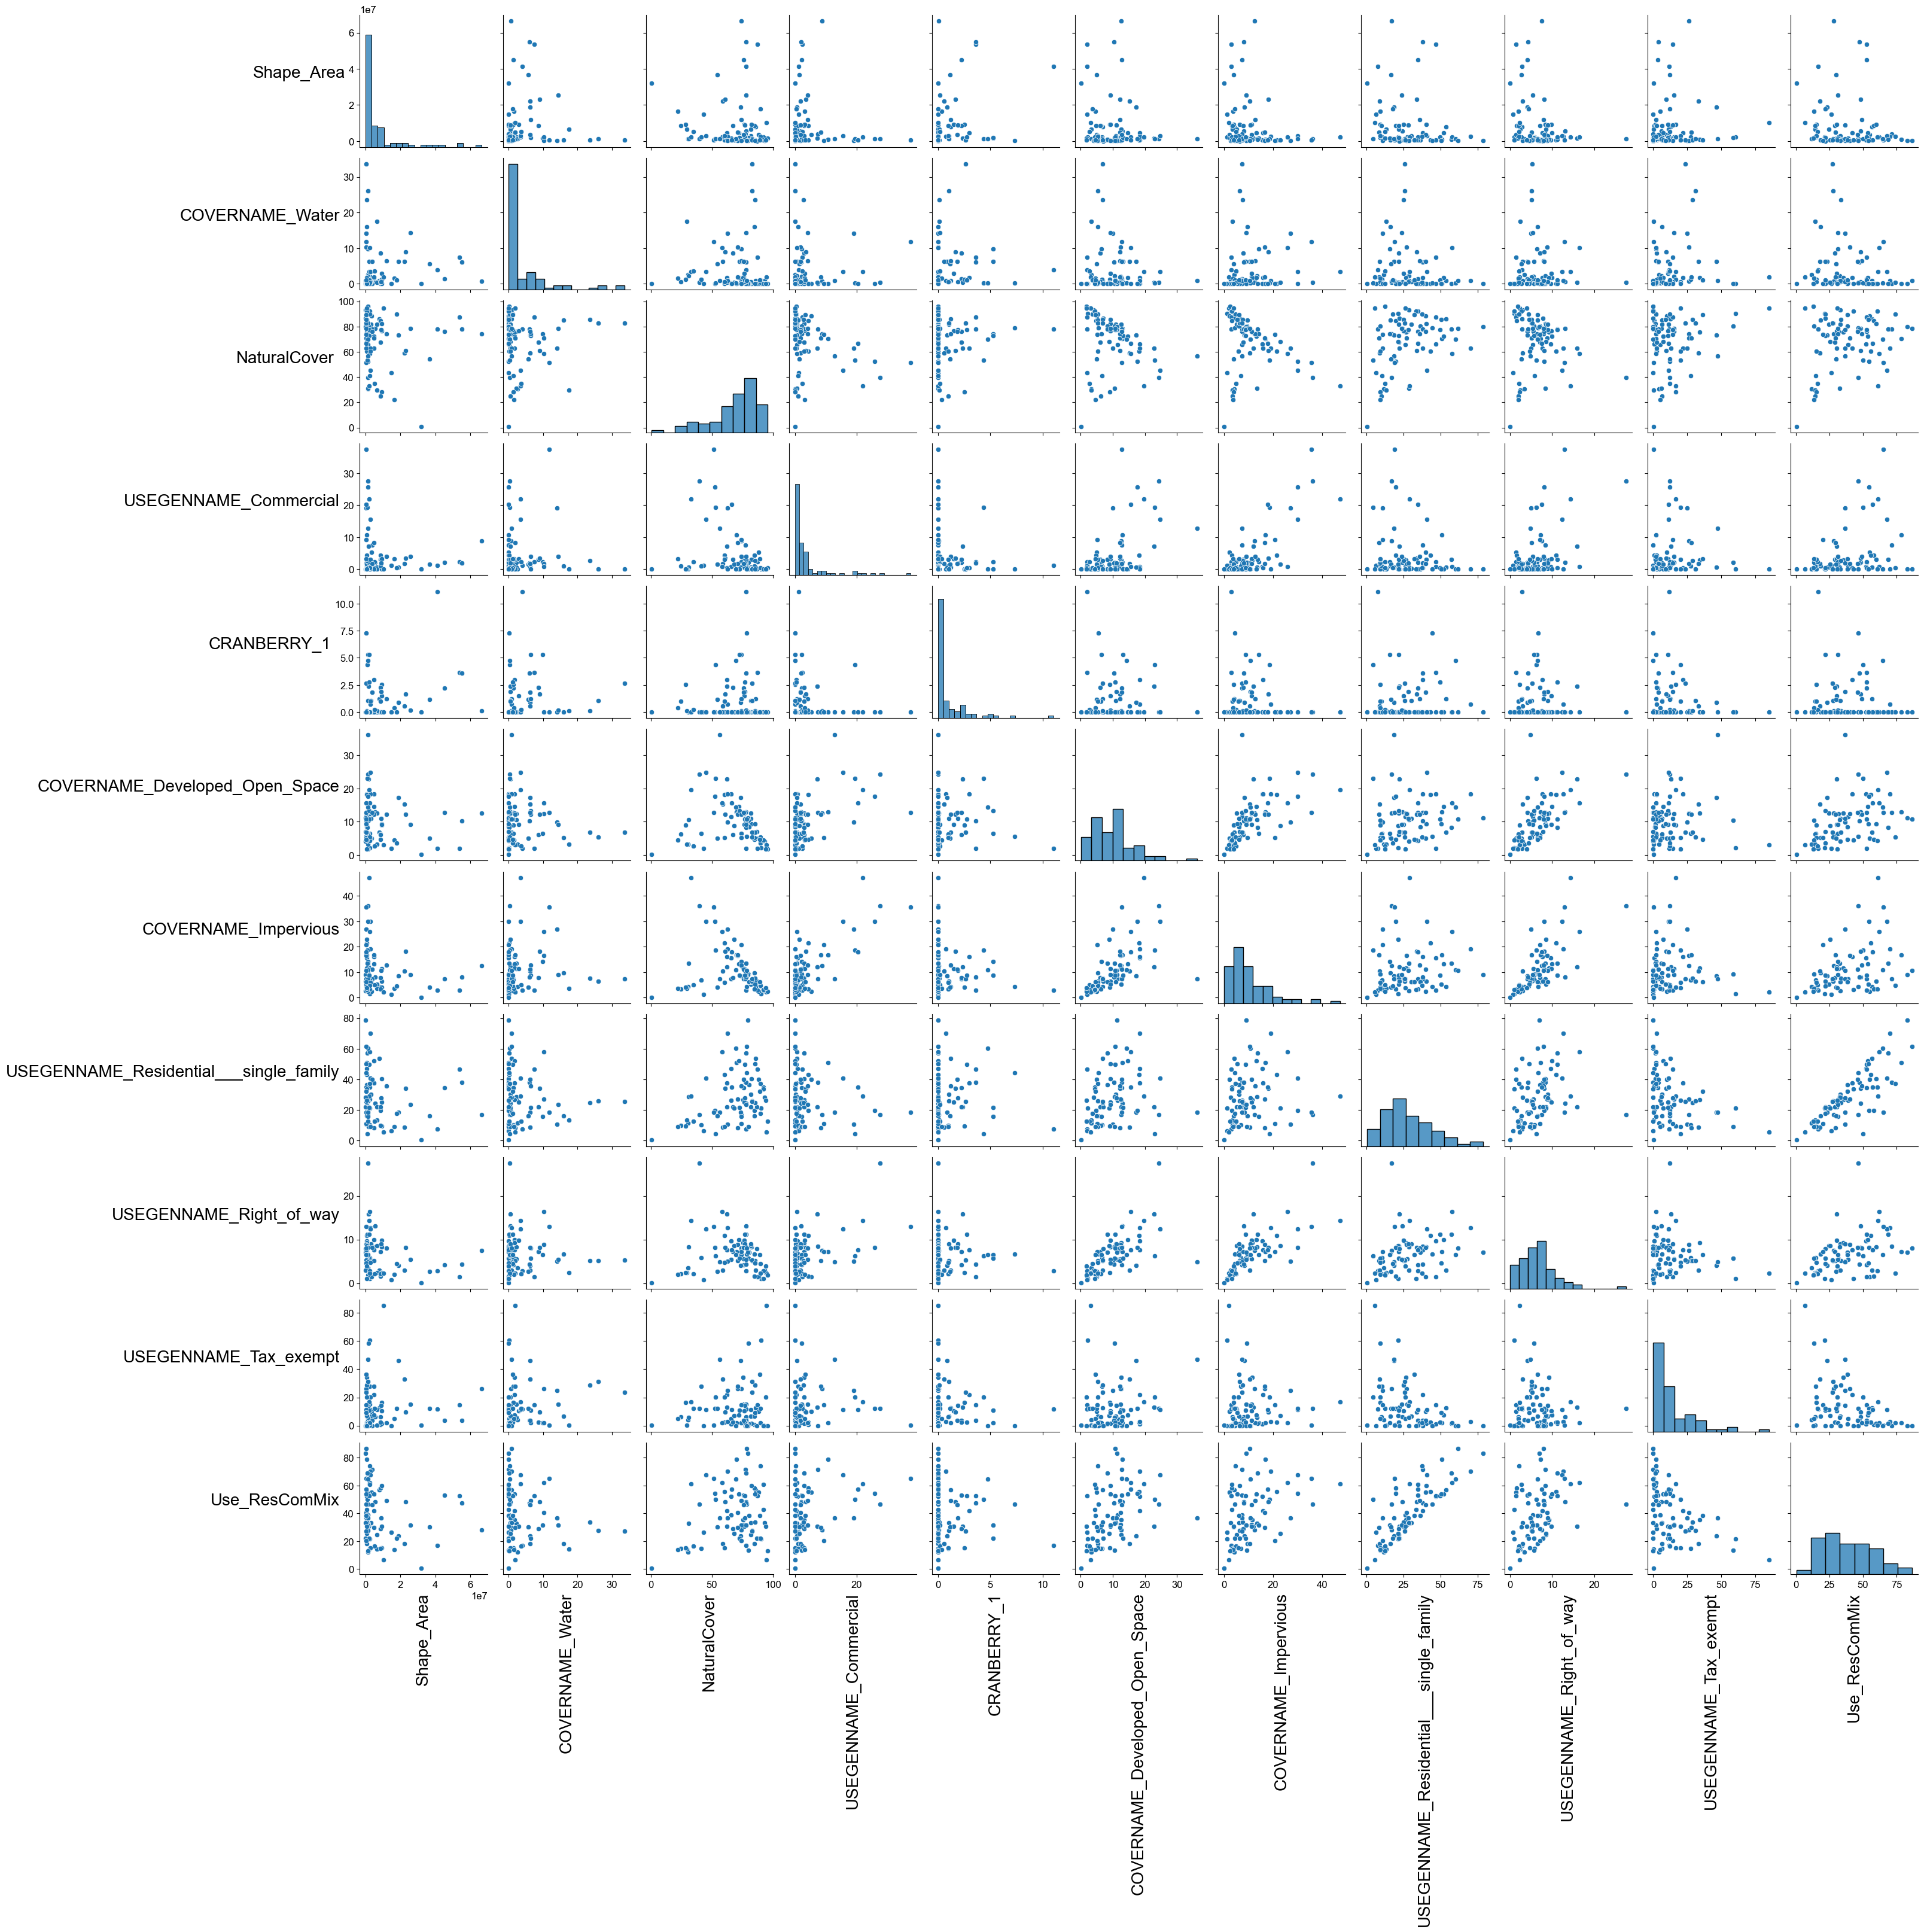

In [274]:
with sns.plotting_context(rc={"axes.labelsize":20}):
    g = sns.pairplot(df[selected_watershed_features]) # show only lower triangle
    for ax in g.axes.flatten():
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel(), rotation = 90)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel(), rotation = 0)
        # set y labels alignment
        ax.yaxis.get_label().set_horizontalalignment('right')

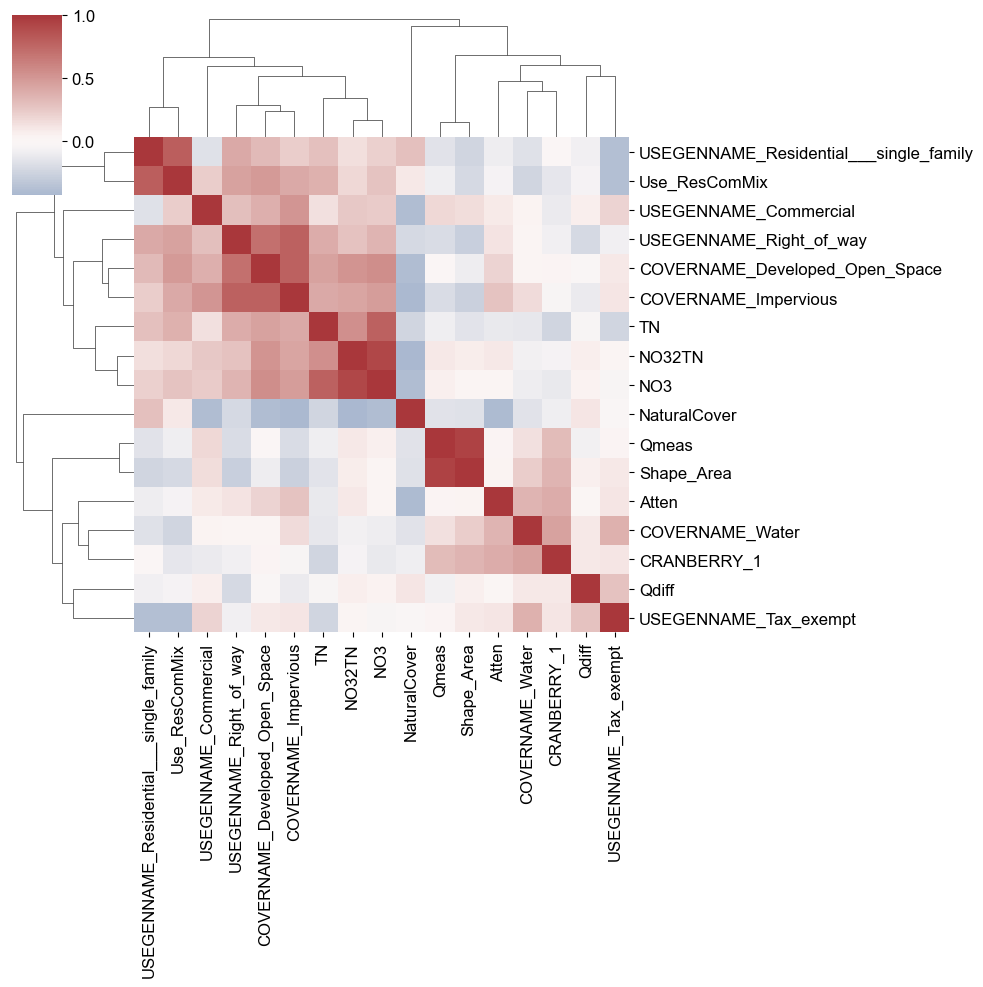

In [275]:
sns.clustermap(df[selected_monitoring_cols+selected_watershed_features].corr('spearman'),cmap="vlag", center=0)

## MODELING

### Linear Regression

In [277]:
# modeling
# Importing libraries for building linear regression model
#import statsmodels
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [293]:
# select Y
y_name = 'Atten'
#_ = df
#_ = df[df['Atten']>0]
_ = df[df['Atten']>-50] # remove outlier attenuation
_ = _[_[y_name].notna()]
#train_target = np.log(_[y_name]) # the untransformed models perform better than transformed ones
train_target = _[y_name]

# select Xs
#selected_features = selected
selected_features = selected_le5 + selected_gt5
#selected_features = selected_le5 + selected_gt5 + selected

#selected_cols = selected_cols
train_features_selected = _.loc[:, ~_.columns.isin(df_monitoring_avg.columns)][selected_features]
train_features_extended = _.loc[:, ~_.columns.isin(df_monitoring_avg.columns)]._get_numeric_data()
#train_features = np.log(train_features_selected + 1)
train_features = train_features_selected

In [294]:
# scale the X data
scaler = StandardScaler()
# Applying fit_transform on the training features data
train_features_scaled = scaler.fit_transform(train_features)
# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
train_features_scaled = pd.DataFrame(train_features_scaled, index = train_features.index, columns = train_features.columns)
train_features_scaled.head()

LE5_Shape_Area  LE5_COVERNAME_Water  LE5_NaturalCover  \
0        1.847814            -0.348902          0.443055   
1       -0.533164            -0.707999         -1.348175   
2       -0.314319            -0.543752         -0.942548   
3       -0.556085            -0.779114          0.718872   
4       -0.499100            -0.779114          0.345413   

   LE5_USEGENNAME_Commercial  LE5_CRANBERRY_1  \
0                  -0.303079         0.022003   
1                   3.078133        -0.336847   
2                   0.210639        -0.336847   
3                  -0.305335        -0.336847   
4                  -0.305335        -0.336847   

   LE5_COVERNAME_Developed_Open_Space  LE5_COVERNAME_Impervious  \
0                           -0.038166                 -0.192748   
1                            3.817652                  6.483493   
2                            4.918801                  2.940182   
3                           -0.590482                 -0.560962   
4                           -0.590482                 -0.560962   

   LE5_USEGENNAME_Residential___single_family  LE5_USEGENNAME_Right_of_way  \
0                                   -0.197076                    -0.450565   
1                                    0.072888                     2.300925   
2                                   -0.019464                     1.340711   
3                                   -0.825932                    -0.641780   
4                                   -0.825932                    -0.641780   

   LE5_USEGENNAME_Tax_exempt  ...  GT5_COVERNAME_Water  GT5_NaturalCover  \
0                   0.005836  ...            -0.076339          0.404692   
1                   2.677995  ...            -0.339395         -1.414429   
2                   3.304983  ...            -0.507953          0.642415   
3                  -0.446286  ...            -0.511202         -0.193271   
4                  -0.446286  ...            -0.377355         -0.183070   

   GT5_USEGENNAME_Commercial  GT5_CRANBERRY_1  \
0                  -0.258937         0.805969   
1                   3.089075        -0.520999   
2                  -0.311292        -0.520999   
3                  -0.443385        -0.520999   
4                  -0.463429        -0.520999   

   GT5_COVERNAME_Developed_Open_Space  GT5_COVERNAME_Impervious  \
0                            0.382901                 -0.430249   
1                            2.050542                  2.568198   
2                            0.139038                 -0.463533   
3                            1.326948                  0.531823   
4                            0.224731                 -0.398301   

   GT5_USEGENNAME_Residential___single_family  GT5_USEGENNAME_Right_of_way  \
0                                    0.359281                    -0.608770   
1                                   -0.835377                     4.798121   
2                                   -0.338534                     1.398005   
3                                    1.278268                     0.735296   
4                                   -0.071918                    -0.288853   

   GT5_USEGENNAME_Tax_exempt  GT5_Use_ResComMix  
0                  -0.670960           0.659030  
1                  -0.255210           0.231301  
2                  -0.683053           0.411594  
3                  -0.813288           0.788087  
4                  -0.553828           0.035403  

[5 rows x 22 columns]

In [295]:
from sklearn.model_selection import train_test_split 
y = train_target
X = train_features_scaled
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=30)

In [296]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
y = train_target
X = train_features_scaled
rg = Ridge(alpha=0.03)
ls = Lasso(alpha=0.02)
en = ElasticNet(alpha=0.03,l1_ratio=0.7)
lr = LinearRegression()

In [297]:
rg.fit(X_train, y_train)
ls.fit(X_train, y_train)
lr.fit(X_train, y_train)
en.fit(X_train, y_train)

ElasticNet(alpha=0.03, l1_ratio=0.7)

In [298]:
from sklearn.feature_selection import SelectFromModel, RFECV, RFE
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

# Use L1 penalty
estimator = LassoCV(cv=10, normalize = True)
#estimator = ElasticNetCV(cv=10, normalize = True)

n_feats = 4 #int(np.floor(X.shape[0]/10/1.5))
# the optimal number of features based on AIC is 4
print("maximum number of features {}".format(n_feats))
if n_feats > X.shape[1]: 
    n_feats=X.shape[1]
# Set a minimum threshold of 0.25
m = SelectFromModel(estimator, prefit=False, norm_order=1, max_features=n_feats)
m.fit(X, y)
feature_idx = m.get_support()
feature_name = X.columns[feature_idx]
print(feature_name)
# get variance inflation factor
vif = fn_get_vif(feature_name,X)
print(vif)

maximum number of features 4
Index(['LE5_COVERNAME_Water', 'LE5_COVERNAME_Impervious', 'GT5_NaturalCover',
       'GT5_COVERNAME_Developed_Open_Space'],
      dtype='object')
VIF is not of concern if less than 3
                                         VIF  Tolerance
LE5_COVERNAME_Water                 1.090986   0.916602
LE5_COVERNAME_Impervious            1.151823   0.868189
GT5_NaturalCover                    1.064119   0.939744
GT5_COVERNAME_Developed_Open_Space  1.135254   0.880860


In [299]:
#import cvoxpt
# Adding the intercept term
train_features_scaled_select = sm.add_constant(train_features_scaled[feature_name])
train_features_scaled.columns

# Calling the OLS algorithm on the train features and the target variable
ols_model_0 = sm.OLS(train_target, train_features_scaled_select)

# Fitting the Model
ols_res_0 = ols_model_0.fit()
#ols_res_0 = ols_model_0.fit_regularized(method='Lasso')

display(ols_res_0.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Atten   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     9.330
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           3.06e-06
Time:                        12:48:55   Log-Likelihood:                -366.58
No. Observations:                  85   AIC:                             743.2
Df Residuals:                      80   BIC:                             755.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 31.7535      2.019     15.725      0.000      27.735      35.772
LE5_COVERNAME_Water                    4.6283      2.109      2.194      0.031       0.431       8.826
LE5_COVERNAME_Impervious              -6.5338      2.167     -3.015      0.003     -10.847      -2.221
GT5_NaturalCover                      -6.1495      2.083     -2.952      0.004     -10.295      -2.004
GT5_COVERNAME_Developed_Open_Space     5.4863      2.152      2.550      0.013       1.205       9.768
==============================================================================
Omnibus:                        0.492   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.782   Jarque-Bera (JB):                0.591
Skew:                           0.169   Prob(JB):                        0.744
Kurtosis:                       2.769   Cond. No.                         1.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

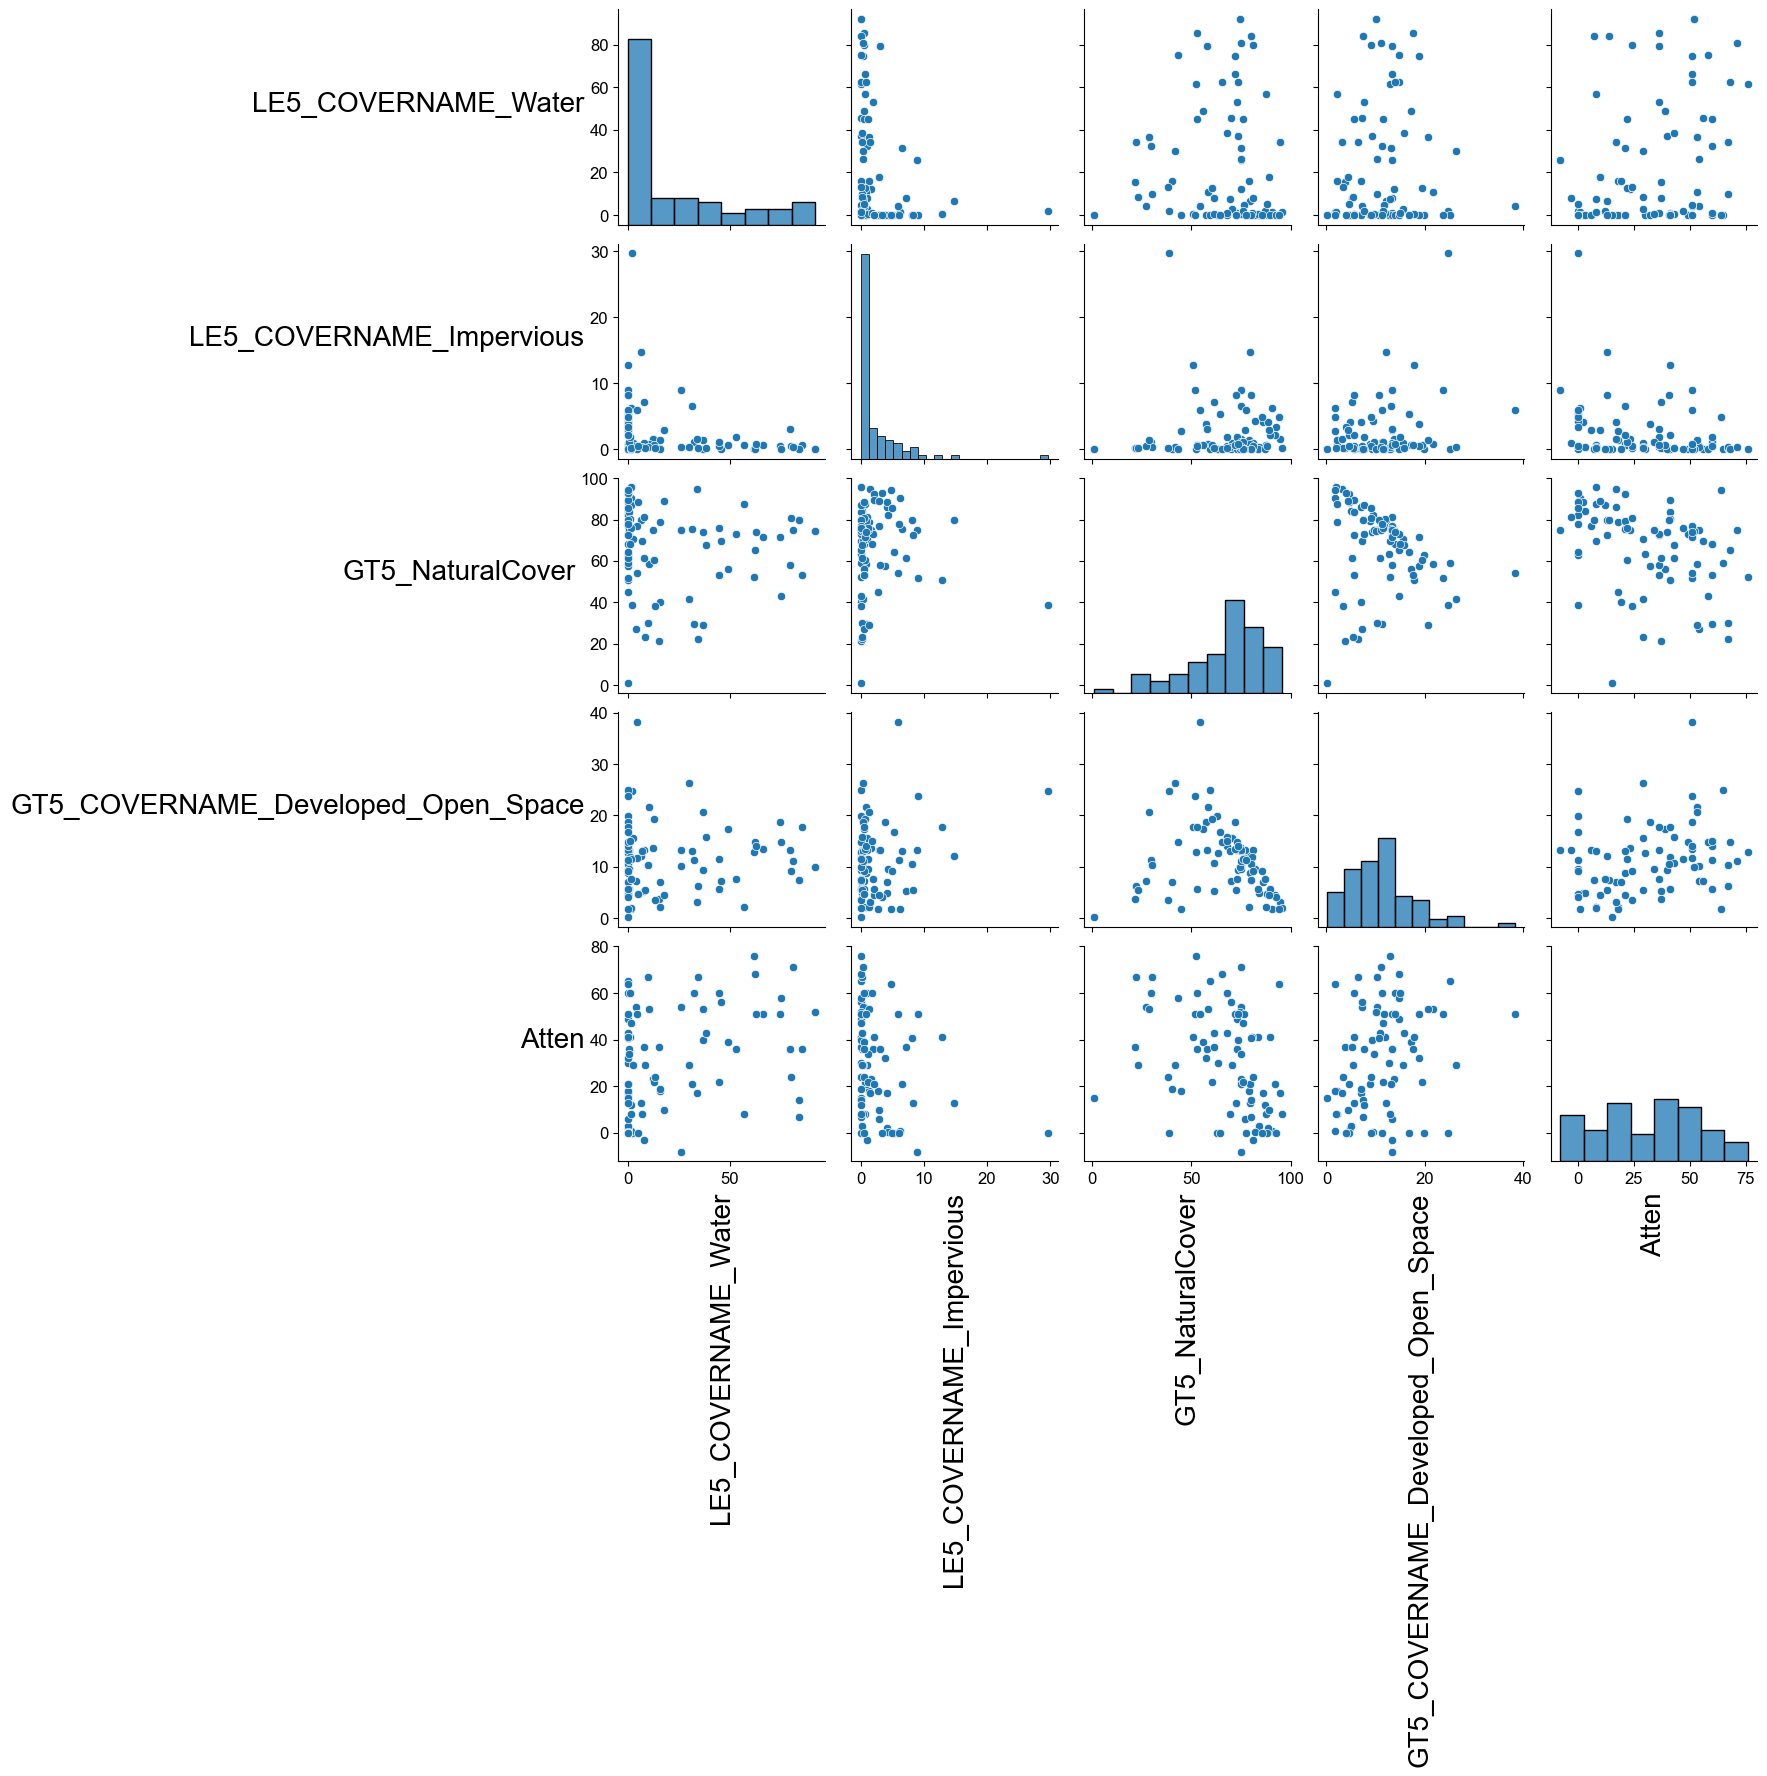

In [300]:
with sns.plotting_context(rc={"axes.labelsize":20}):
    g = sns.pairplot(_[feature_name].join(_[y_name])) # show only lower triangle
    for ax in g.axes.flatten():
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel(), rotation = 90)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel(), rotation = 0)
        # set y labels alignment
        ax.yaxis.get_label().set_horizontalalignment('right')

running cross validation with ShuffleSplit: n_splits=17, test_size=0.3, rand_state = 0
0.22 accuracy with a standard deviation of 0.18


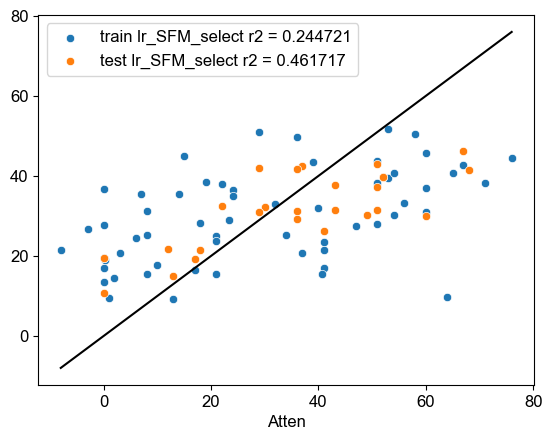

In [302]:
lr_select = lr.fit(X_train[feature_name],y_train)
fn_sklearn_cross_val_scores(lr_select,X[feature_name],y)
fn_plot_obs_vs_pred(lr_select,X_test[feature_name],X_train[feature_name],y_test,y_train,'lr_SFM_select')

Index(['LE5_COVERNAME_Water', 'GT5_COVERNAME_Water', 'GT5_NaturalCover',
       'GT5_CRANBERRY_1'],
      dtype='object')
VIF is not of concern if less than 3
                          VIF  Tolerance
LE5_COVERNAME_Water  1.488104   0.671996
GT5_COVERNAME_Water  1.845902   0.541740
GT5_NaturalCover     1.037716   0.963655
GT5_CRANBERRY_1      1.299486   0.769535
running cross validation with ShuffleSplit: n_splits=17, test_size=0.3, rand_state = 0
0.16 accuracy with a standard deviation of 0.16


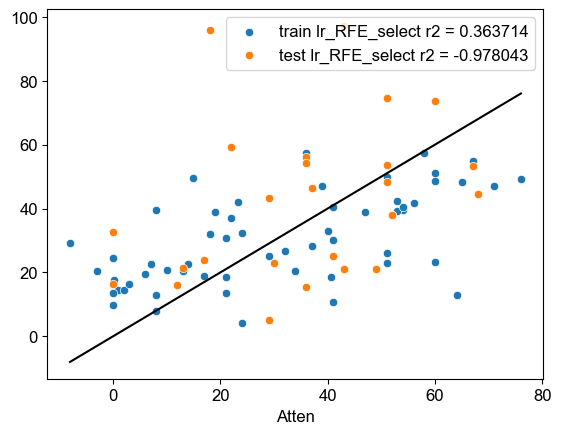

In [303]:
# recursive feature elimination
# THIS TAKES A LONG TIME TO RUN
m = RFE(estimator,n_features_to_select=n_feats)
m.fit(X,y)
feature_idx = m.get_support()
feature_name = X.columns[feature_idx]
print(feature_name)
print(fn_get_vif(feature_name,X))
lr_select = lr.fit(X_train[feature_name],y_train)
fn_sklearn_cross_val_scores(lr_select,X[feature_name],y)
fn_plot_obs_vs_pred(lr_select,X_test[feature_name],X_train[feature_name],y_test,y_train,'lr_RFE_select')

In [304]:
# Adding the intercept term
train_features_scaled_select = sm.add_constant(train_features_scaled[feature_name])
train_features_scaled.columns
from functions import *

# get variance inflation factor
vif = fn_get_vif(feature_name,train_features_scaled_select)
print(vif)
# Calling the OLS algorithm on the train features and the target variable
ols_model_0 = sm.OLS(train_target, train_features_scaled_select)

# Fitting the Model
ols_res_0 = ols_model_0.fit()
#ols_res_0 = ols_model_0.fit_regularized(method='sqrt_lasso')

display(ols_res_0.summary())

VIF is not of concern if less than 3
                          VIF  Tolerance
LE5_COVERNAME_Water  1.488104   0.671996
GT5_COVERNAME_Water  1.845902   0.541740
GT5_NaturalCover     1.037716   0.963655
GT5_CRANBERRY_1      1.299486   0.769535


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Atten   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     8.247
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           1.27e-05
Time:                        12:49:31   Log-Likelihood:                -368.18
No. Observations:                  85   AIC:                             746.4
Df Residuals:                      80   BIC:                             758.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  31.7535      2.058     15.432      0.000      27.659      35.848
LE5_COVERNAME_Water     9.1274      2.510      3.636      0.000       4.132      14.123
GT5_COVERNAME_Water    -6.8559      2.796     -2.452      0.016     -12.419      -1.292
GT5_NaturalCover       -7.0248      2.096     -3.351      0.001     -11.196      -2.853
GT5_CRANBERRY_1         6.1794      2.346      2.634      0.010       1.511      10.847
==============================================================================
Omnibus:                        4.541   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                2.386
Skew:                           0.129   Prob(JB):                        0.303
Kurtosis:                       2.221   Cond. No.                         2.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

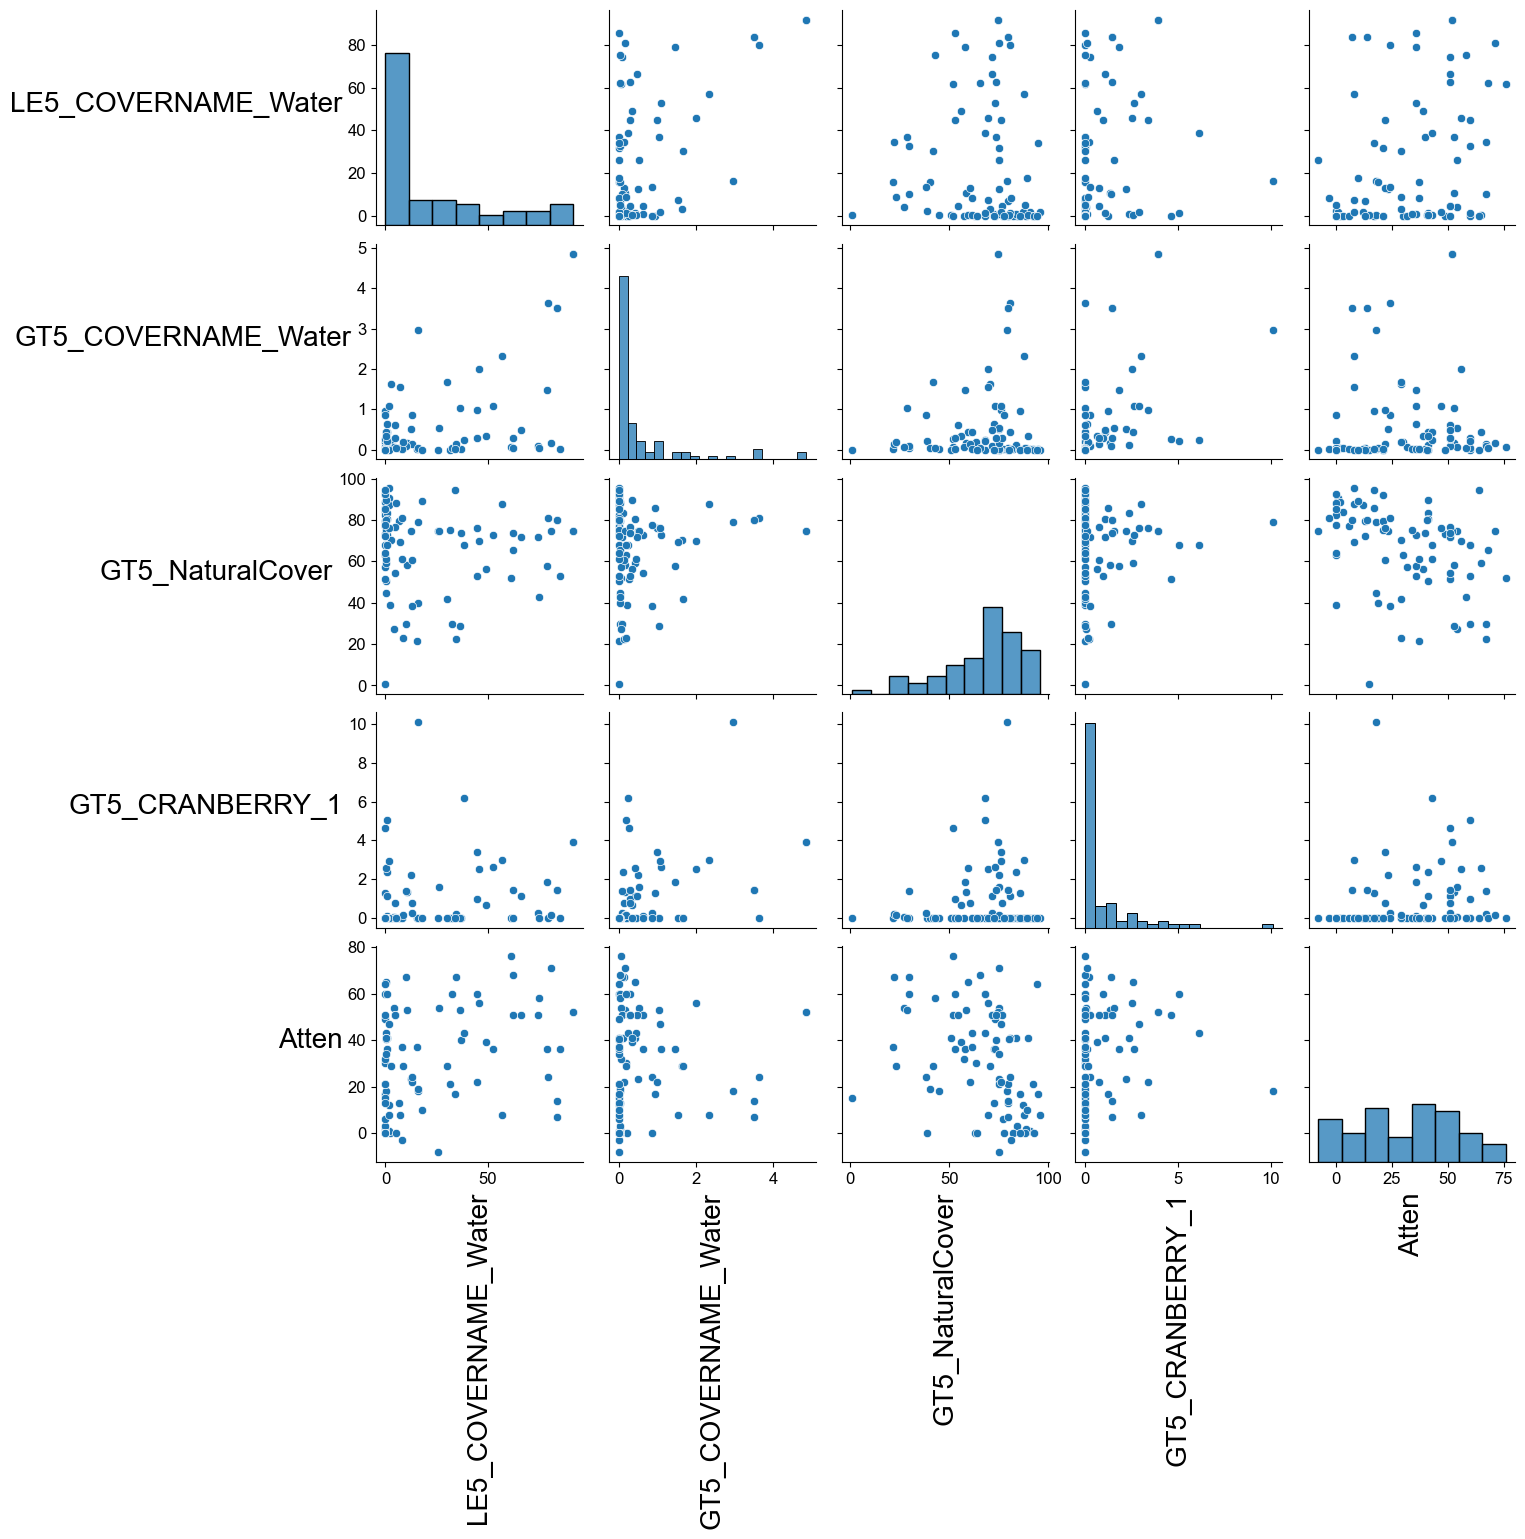

In [305]:
with sns.plotting_context(rc={"axes.labelsize":20}):
    g = sns.pairplot(_[feature_name].join(_[y_name])) # show only lower triangle
    for ax in g.axes.flatten():
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel(), rotation = 90)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel(), rotation = 0)
        # set y labels alignment
        ax.yaxis.get_label().set_horizontalalignment('right')

Index(['LE5_COVERNAME_Developed_Open_Space',
       'GT5_COVERNAME_Developed_Open_Space', 'GT5_COVERNAME_Impervious',
       'GT5_Use_ResComMix'],
      dtype='object')
VIF is not of concern if less than 3
                                         VIF  Tolerance
LE5_COVERNAME_Developed_Open_Space  1.021663   0.978796
GT5_COVERNAME_Developed_Open_Space  1.595044   0.626942
GT5_COVERNAME_Impervious            1.634764   0.611709
GT5_Use_ResComMix                   1.234463   0.810069
running cross validation with ShuffleSplit: n_splits=17, test_size=0.3, rand_state = 0
0.13 accuracy with a standard deviation of 0.12


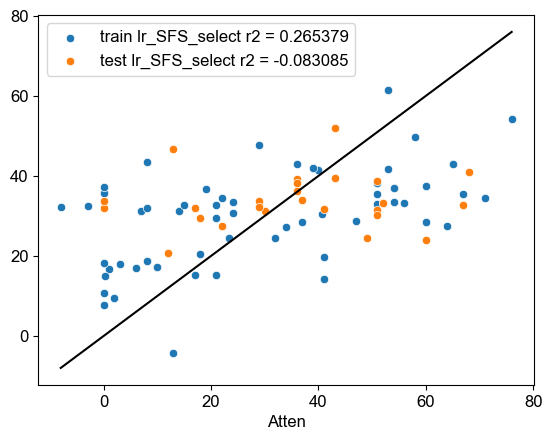

In [306]:
# forward feature selection
from sklearn.feature_selection import SequentialFeatureSelector
m = SequentialFeatureSelector(estimator, n_features_to_select=n_feats)
m.fit(X,y)
feature_idx = m.get_support()
feature_name = X.columns[feature_idx]
print(feature_name)
vif = fn_get_vif(feature_name,X)
print(vif)
lr_select = lr.fit(X_train[feature_name],y_train)
fn_sklearn_cross_val_scores(lr_select,X[feature_name],y)
fn_plot_obs_vs_pred(lr_select,X_test[feature_name],X_train[feature_name],y_test,y_train,'lr_SFS_select')

In [307]:
# Adding the intercept term
train_features_scaled_select = sm.add_constant(train_features_scaled[feature_name])
train_features_scaled.columns
from functions import *

# get variance inflation factor
vif = fn_get_vif(feature_name,train_features_scaled_select)
print(vif)
# Calling the OLS algorithm on the train features and the target variable
ols_model_0 = sm.OLS(train_target, train_features_scaled_select)

# Fitting the Model
ols_res_0 = ols_model_0.fit()
#ols_res_0 = ols_model_0.fit_regularized(method='sqrt_lasso')

display(ols_res_0.summary())

VIF is not of concern if less than 3
                                         VIF  Tolerance
LE5_COVERNAME_Developed_Open_Space  1.021663   0.978796
GT5_COVERNAME_Developed_Open_Space  1.595044   0.626942
GT5_COVERNAME_Impervious            1.634764   0.611709
GT5_Use_ResComMix                   1.234463   0.810069


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Atten   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     6.061
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           0.000260
Time:                        12:50:03   Log-Likelihood:                -371.60
No. Observations:                  85   AIC:                             753.2
Df Residuals:                      80   BIC:                             765.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 31.7535      2.142     14.823      0.000      27.490      36.017
LE5_COVERNAME_Developed_Open_Space    -7.5611      2.165     -3.492      0.001     -11.870      -3.252
GT5_COVERNAME_Developed_Open_Space     4.7025      2.706      1.738      0.086      -0.682      10.087
GT5_COVERNAME_Impervious               5.5360      2.739      2.021      0.047       0.085      10.987
GT5_Use_ResComMix                     -3.6276      2.380     -1.524      0.131      -8.364       1.109
==============================================================================
Omnibus:                        2.671   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.263   Jarque-Bera (JB):                1.740
Skew:                          -0.105   Prob(JB):                        0.419
Kurtosis:                       2.331   Cond. No.                         2.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

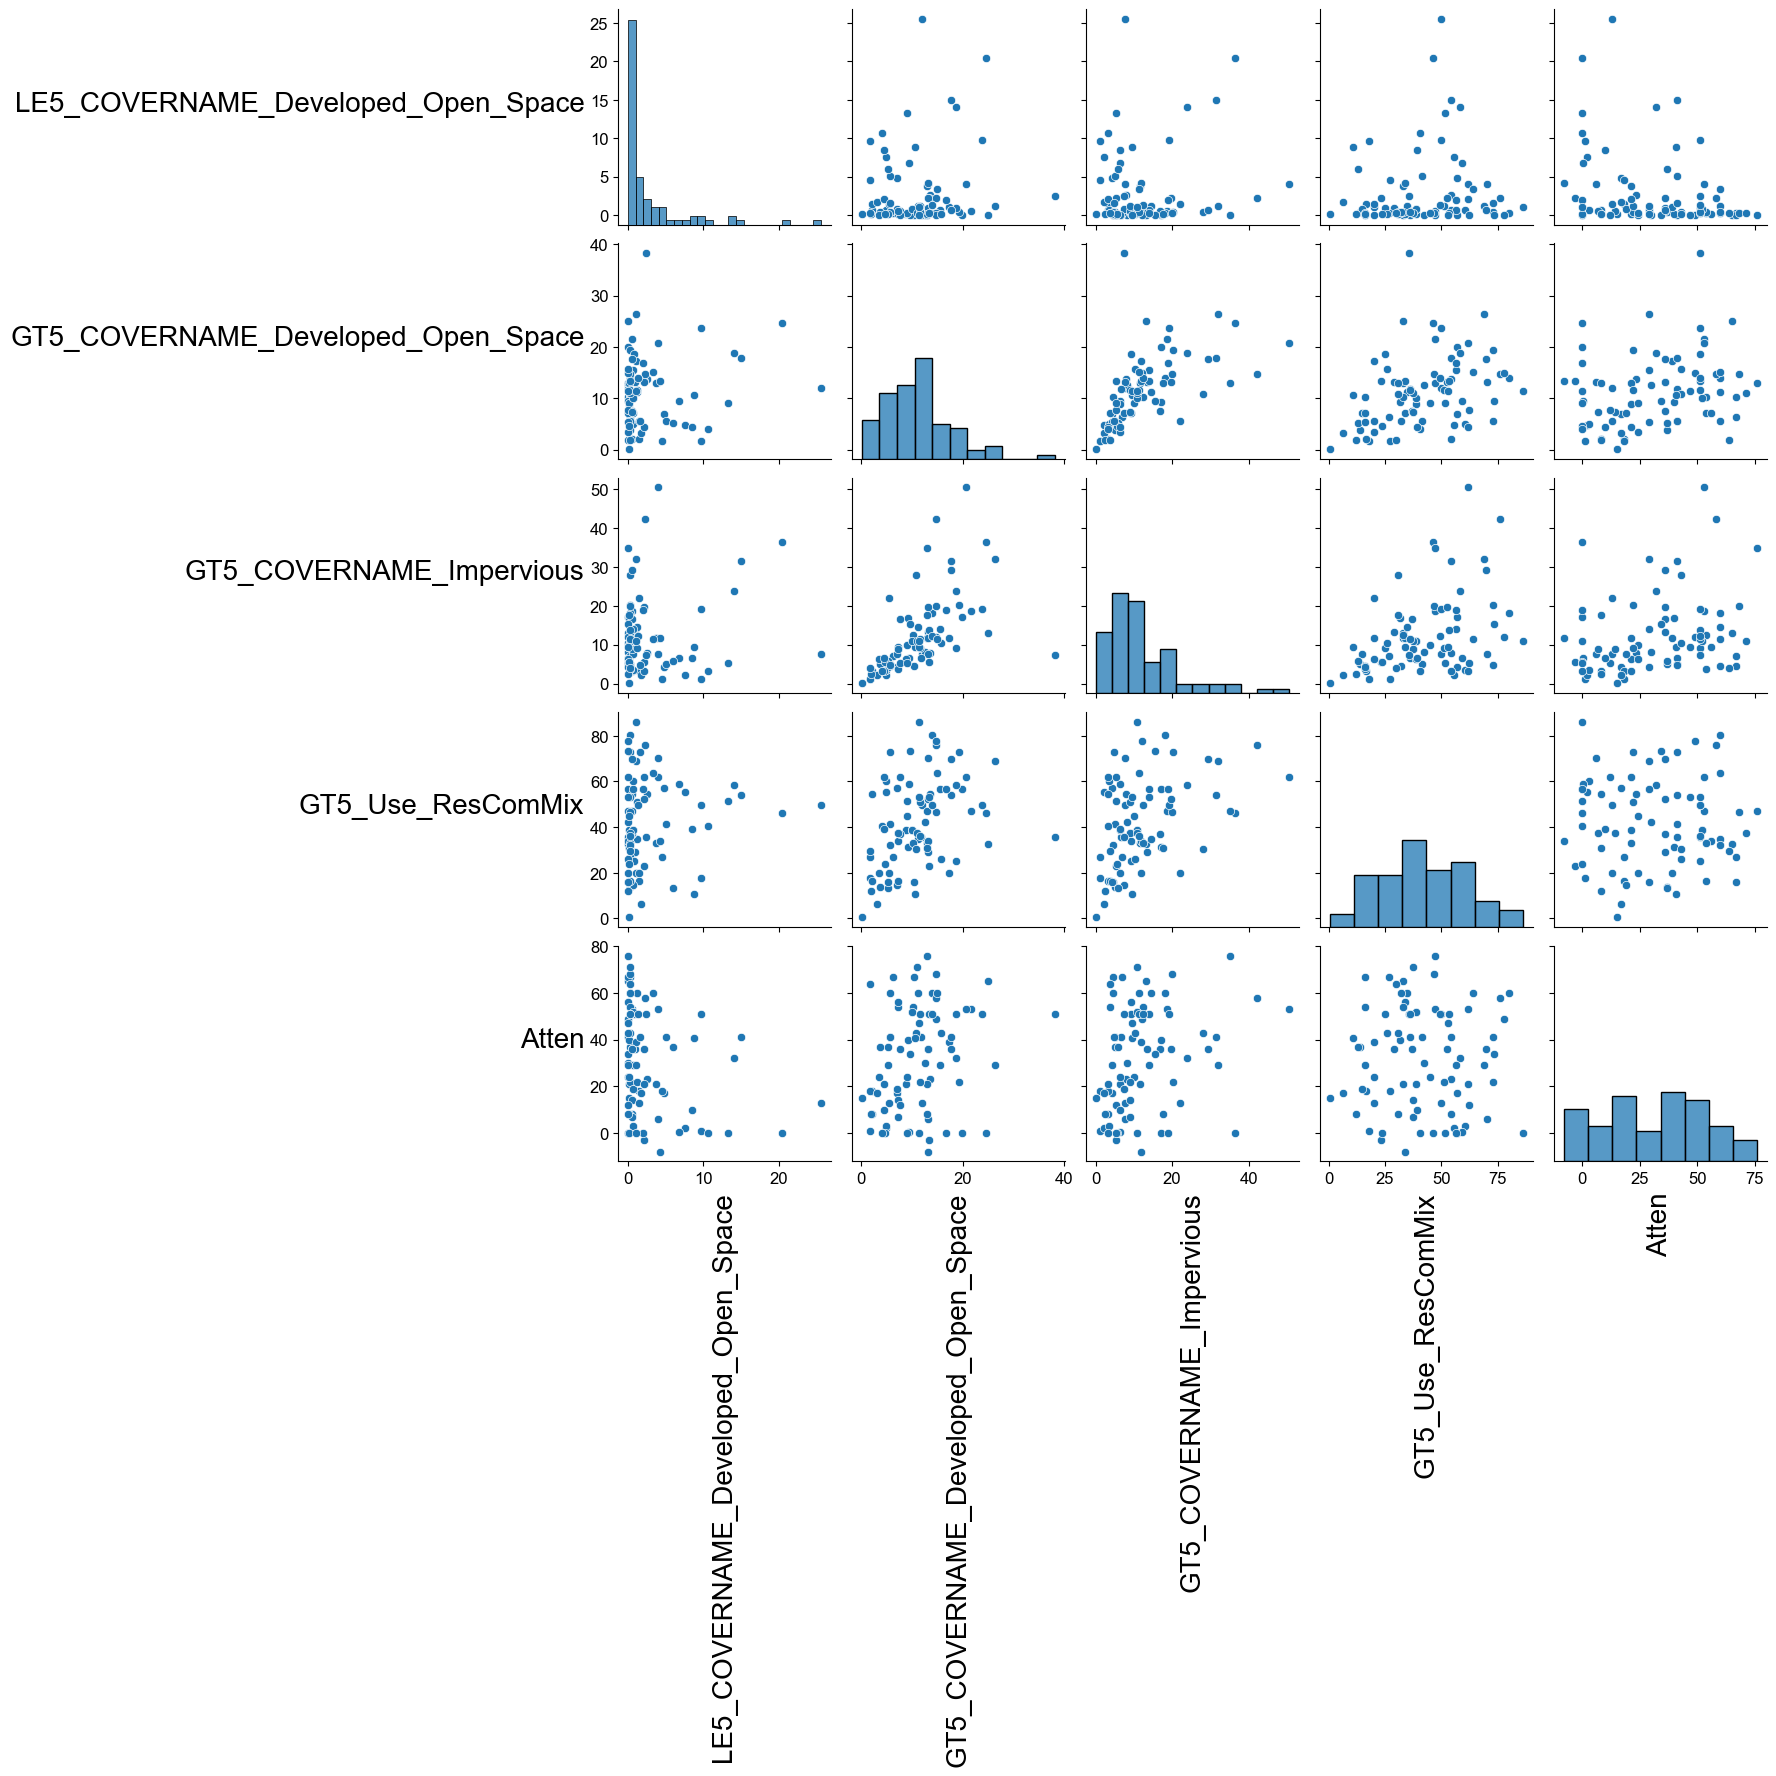

In [308]:
with sns.plotting_context(rc={"axes.labelsize":20}):
    g = sns.pairplot(_[feature_name].join(_[y_name])) # show only lower triangle
    for ax in g.axes.flatten():
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel(), rotation = 90)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel(), rotation = 0)
        # set y labels alignment
        ax.yaxis.get_label().set_horizontalalignment('right')

### Tree and Ensemble Learning
Here I test methods of regression trees for explaining variation in NOx

I use [SHAP - SHapley Addative exPlanations](https://shap.readthedocs.io/en/latest/index.html) to explain the impact of variables on NOx values

Lundberg, S. M., & Lee, S. I. (2017). A unified approach to interpreting model predictions. Advances in neural information processing systems, 30.

In [237]:
# select Y
y_name = 'Atten'
_ = df[df['Atten']>-50] # remove outlier attenuation
_ = _[_[y_name].notna()]
#train_target = np.log(_[y_name])
train_target = _[y_name]
# select Xs
selected_features = selected
#selected_features = selected_le5 + selected_gt5
#selected_features = selected_le5 + selected_gt5 + selected
#selected_cols = selected_cols
train_features_selected = _.loc[:, ~_.columns.isin(df_monitoring_avg.columns)][selected_features]
train_features_extended = _.loc[:, ~_.columns.isin(df_monitoring_avg.columns)]._get_numeric_data()
#train_features = np.log(train_features_selected + 1)
train_features = train_features_selected

In [238]:
# scale the X data
scaler = StandardScaler()
# Applying fit_transform on the training features data
train_features_scaled = scaler.fit_transform(train_features)
# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
train_features_scaled = pd.DataFrame(train_features_scaled, index = train_features.index, columns = train_features.columns)
train_features_scaled.head()

Shape_Area  COVERNAME_Water  NaturalCover  USEGENNAME_Commercial  \
0    2.784686        -0.406132      0.373656              -0.266089   
1   -0.496126        -0.541969     -1.500478               3.340406   
2   -0.187647        -0.519748      0.477561              -0.284897   
3   -0.539974        -0.583611     -0.150390              -0.453348   
4   -0.482574        -0.566151     -0.164213              -0.474480   

   CRANBERRY_1  ACTIVE_1  COVERNAME_Developed_Open_Space  \
0     0.668185  0.614924                        0.439161   
1    -0.536986 -0.509771                        2.265679   
2    -0.536986 -0.509771                        0.455943   
3    -0.536986 -0.509771                        1.303924   
4    -0.536986 -0.509771                        0.222007   

   COVERNAME_Impervious  USEGENNAME_Residential___single_family  \
0             -0.377940                                0.399648   
1              2.924523                               -0.698813   
2             -0.305308                               -0.238164   
3              0.578122                                1.170480   
4             -0.374337                               -0.109476   

   USEGENNAME_Right_of_way  USEGENNAME_Tax_exempt  Use_ResComMix  
0                -0.549321              -0.641272       0.716725  
1                 4.990086              -0.080980       0.383976  
2                 1.547715              -0.479788       0.478679  
3                 0.752457              -0.810915       0.686194  
4                -0.267474              -0.552864      -0.026164

In [239]:
from sklearn.model_selection import train_test_split 
y = train_target
X = train_features_scaled
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=30)

running cross validation with ShuffleSplit: n_splits=17, test_size=0.3, rand_state = 0
0.11 accuracy with a standard deviation of 0.20


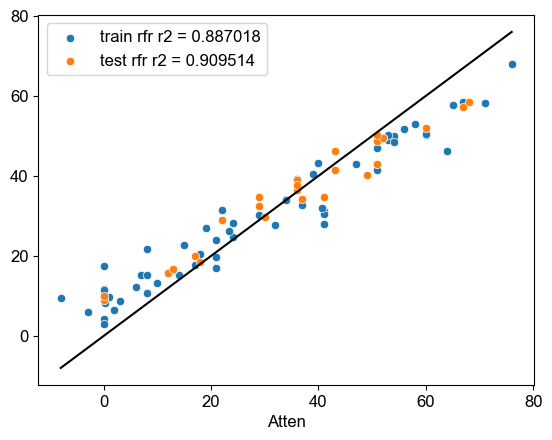

In [309]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X, y)
fn_sklearn_cross_val_scores(rfr,X,y)
# plot obs vs fitted
fn_plot_obs_vs_pred(rfr,X_test,X_train,y_test,y_train,'rfr')

Elapsed time to compute the importances: 0.010 seconds


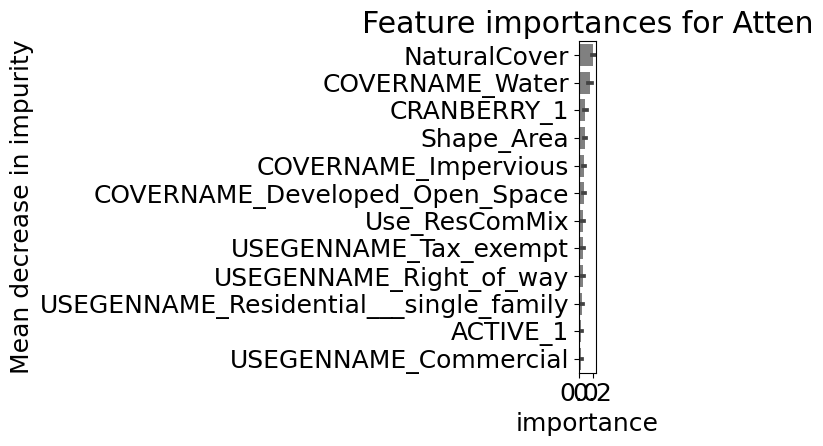

In [241]:
df_importance = fn_ensemble_feature_importance_plot(rfr,X.columns,y_name)

In [192]:
def fn_shap_model_explainer(
    m,# fitted model 
    X,# array of explanatory variables
    fig_prefix="rfr",
    # save figures to png
    save_figs = True
    ):
    %matplotlib auto
    '''
    # use this line to install shap if needed
    !pip install shap
    # https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/heatmap.html
    '''
    import shap
    # Fits the explainer
    explainer = shap.Explainer(m, X) # Calculates the SHAP values - It takes some time
    shap_values = explainer(X)
    
    # Plot beeswarm
    shap.plots.beeswarm(shap_values,max_display=10)
    plt.savefig('{}_shap_beeswarm.png'.format(fig_prefix), format='png', dpi=600, bbox_inches='tight')
    plt.close()
    
    # Plot heatmap
    shap.plots.heatmap(shap_values,instance_order=shap_values.sum(1),max_display=10,show=False)
    plt.savefig('{}_shap_heatmap.png'.format(fig_prefix), format='png', dpi=600, bbox_inches='tight')
    plt.close()
    
    # Plot waterfall
    shap.plots.waterfall(shap_values[0])
    plt.savefig('{}_shap_waterfall.png'.format(fig_prefix), format='png', dpi=600, bbox_inches='tight')
    plt.close()
    %matplotlib inline

In [310]:
# Fits the explainer
import shap
m = rfr
fig_prefix = "rfr"
explainer = shap.Explainer(m, X) # Calculates the SHAP values - It takes some time
shap_values = explainer(X)

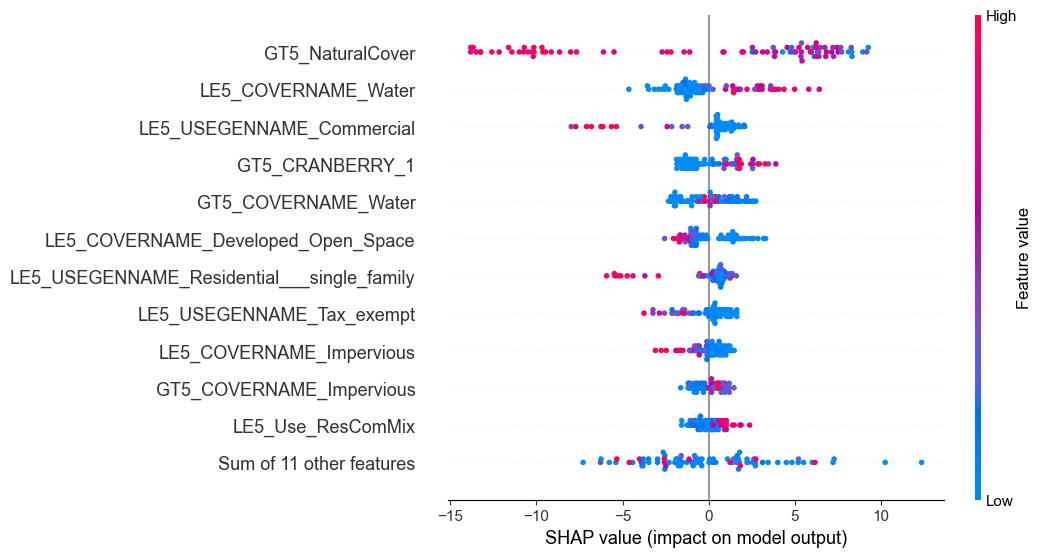

In [311]:
# Plot beeswarm
shap.plots.beeswarm(shap_values,order=shap_values.abs.sum(0),max_display=12)
plt.savefig('{}_shap_beeswarm.png'.format(fig_prefix), format='png', dpi=600, bbox_inches='tight')
plt.close()

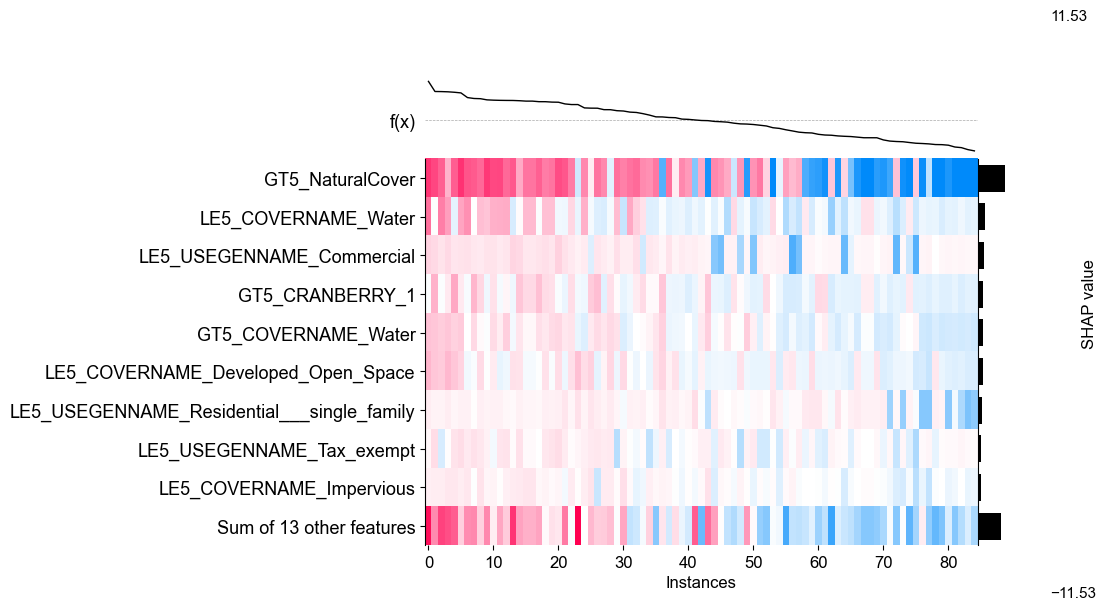

In [312]:
# Plot heatmap
shap.plots.heatmap(shap_values,instance_order=shap_values.sum(1),max_display=10)
plt.savefig('{}_shap_heatmap.png'.format(fig_prefix), format='png', dpi=600, bbox_inches='tight')
plt.close()

In [196]:
shap_values[83]

.values =
array([ 1.65448477, -0.72002506, -0.28732862,  0.98381129, -1.00939765,
       -0.12171833, 12.19380369,  0.02509974, -0.05632864,  0.88964054,
        2.39264694,  0.11981439])

.base_values =
31.57016274509805

.data =
array([-0.54276934, -0.58902899,  1.30391666, -0.58070656, -0.53698608,
       -0.50977089, -1.32946234, -0.78438523, -0.11456017, -0.61258631,
        0.43107375, -0.44198638])

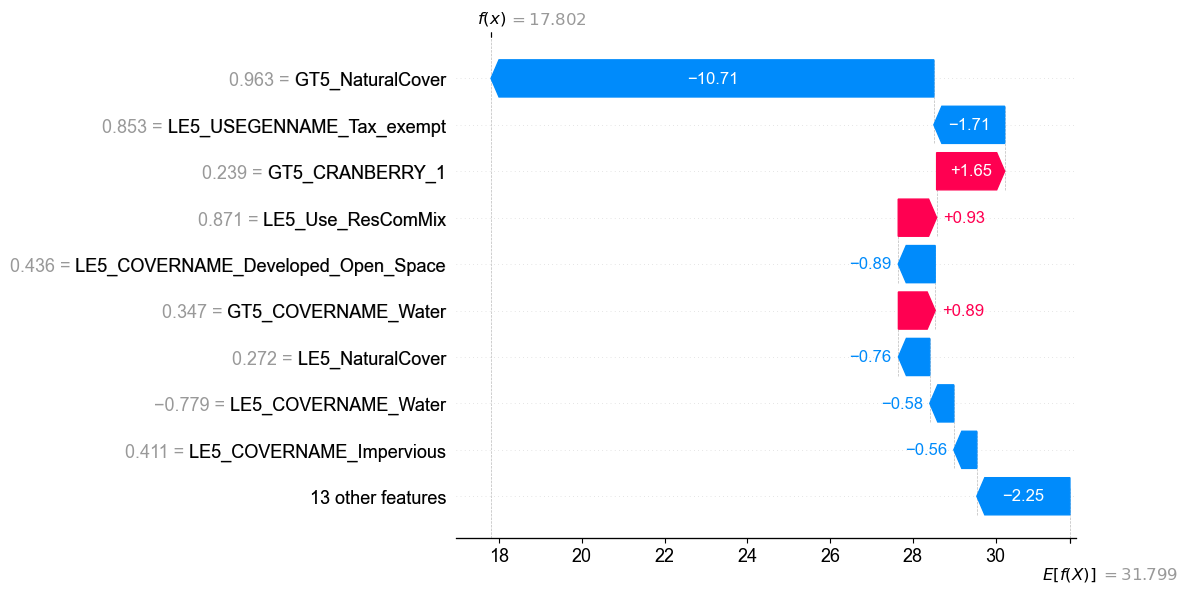

In [313]:
# Plot waterfall
shap.plots.waterfall(shap_values[6])
plt.savefig('{}_shap_waterfall.png'.format(fig_prefix), format='png', dpi=600, bbox_inches='tight')
plt.close()

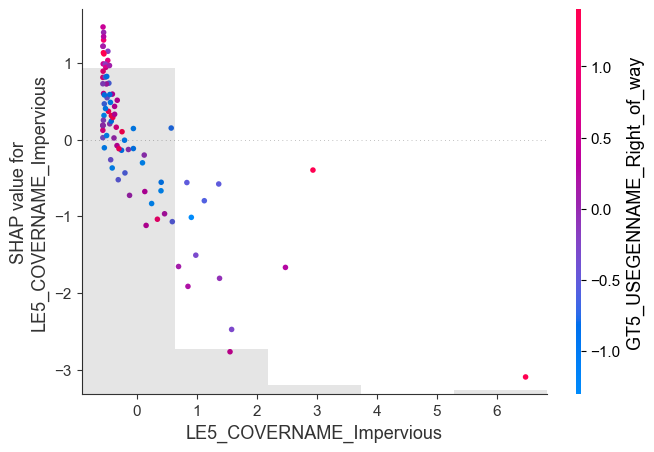

In [316]:
shap.plots.scatter(shap_values[:,"LE5_COVERNAME_Impervious"], color=shap_values)

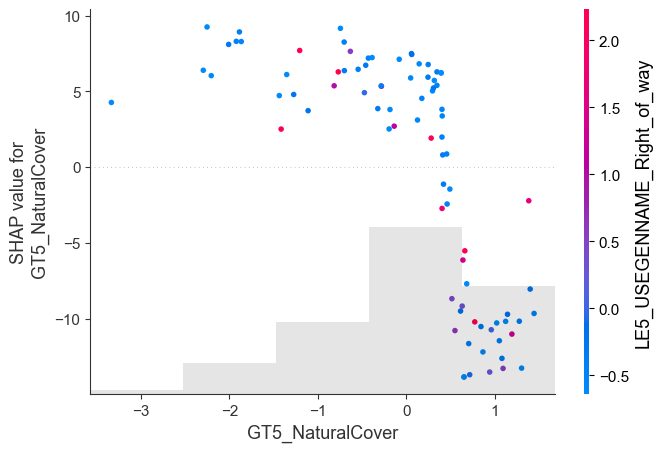

In [322]:
shap.plots.scatter(shap_values[:,"GT5_NaturalCover"],color=shap_values)

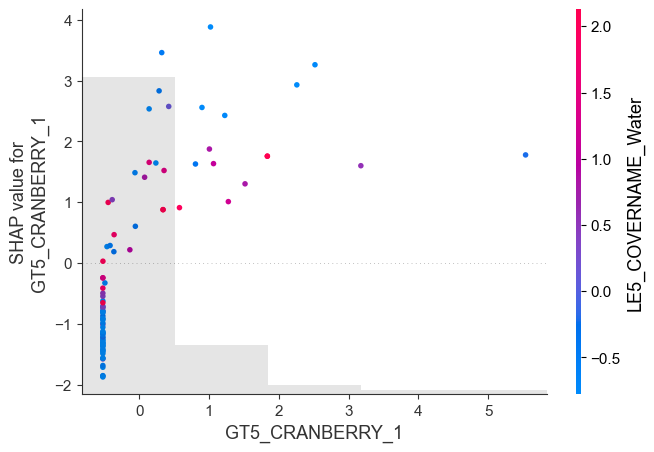

In [320]:
shap.plots.scatter(shap_values[:,"GT5_CRANBERRY_1"],color=shap_values)

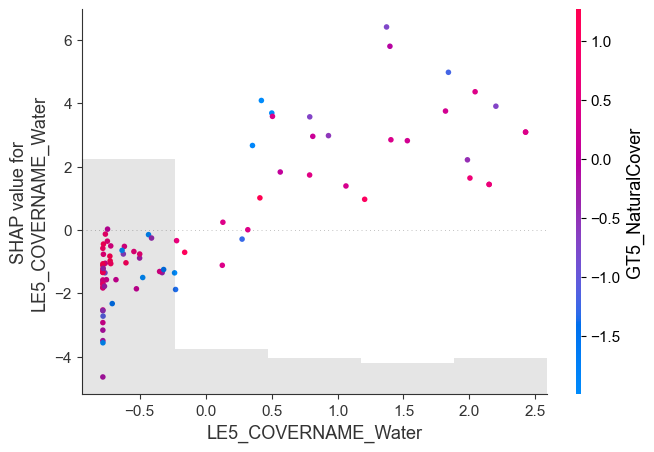

In [321]:
shap.plots.scatter(shap_values[:,"LE5_COVERNAME_Water"],color=shap_values)

running cross validation with ShuffleSplit: n_splits=17, test_size=0.3, rand_state = 0
0.09 accuracy with a standard deviation of 0.08


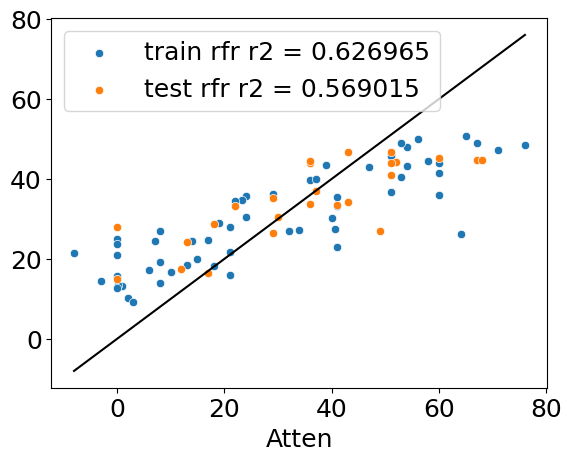

In [201]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_features=4,min_samples_leaf=4,n_estimators=200)
rfr.fit(X, y)
fn_sklearn_cross_val_scores(rfr,X,y)
# plot obs vs fitted
fn_plot_obs_vs_pred(rfr,X_test,X_train,y_test,y_train,'rfr')

Elapsed time to compute the importances: 0.011 seconds


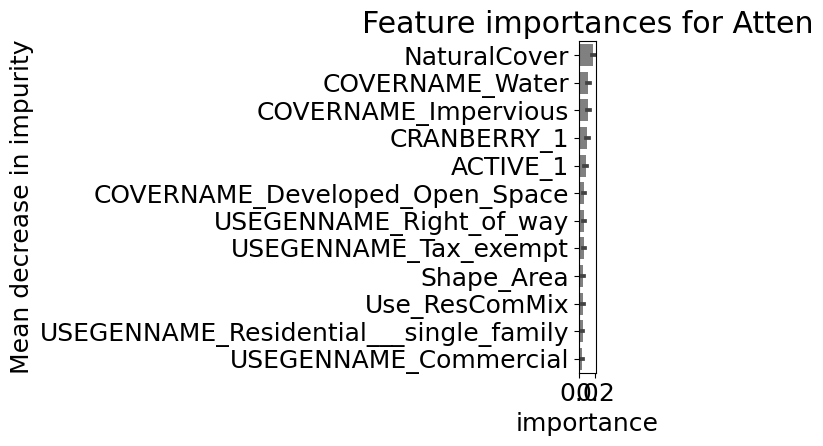

In [202]:
df_importance = fn_ensemble_feature_importance_plot(rfr,X.columns,y_name)

In [203]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfr.get_params())

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 2, stop = 400, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1,3,10]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [4, 8, 16]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 3, 6]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print("\nRandom Search Grid:\n")
pprint(random_grid)

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 4,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Random Search Grid:

{'bootstrap': [True, False],
 'max_depth': [1, 3, 10],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 3, 6],
 'min_samples_split': [4, 8, 16],
 'n_estimators': [2, 46, 90, 134, 178, 223, 267, 311, 355, 400]}


In [204]:
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [205]:
# Fit the random search model
rfr_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_features=4,
                                                   min_samples_leaf=4,
                                                   n_estimators=200),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 3, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 6],
                                        'min_samples_split': [4, 8, 16],
                                        'n_estimators': [2, 46, 90, 134, 178,
                                                         223, 267, 311, 355,
                                                         400]},
                   random_state=42, verbose=2)

{'n_estimators': 2, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 'auto', 'max_depth': 1, 'bootstrap': True}
running cross validation with ShuffleSplit: n_splits=17, test_size=0.3, rand_state = 0
-0.05 accuracy with a standard deviation of 0.14


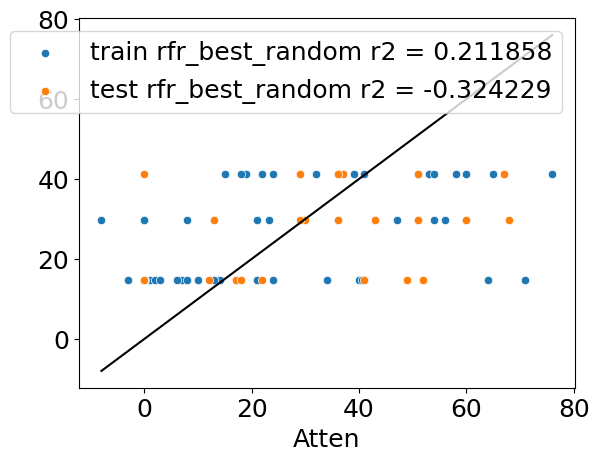

In [206]:
# Fit the random search model
print(rfr_random.best_params_)

# save the best random trianed model
rfr_best_random = rfr_random.best_estimator_
fn_sklearn_cross_val_scores(rfr_best_random,X,y)
# plot obs vs fitted
fn_plot_obs_vs_pred(rfr_best_random,X_test,X_train,y_test,y_train,'rfr_best_random')

In [207]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [3,6,12],
    'max_features': ['sqrt','log2'],
    'min_samples_leaf': [3, 4, 5, 6],
    'min_samples_split': [8,10,12],
    'n_estimators': [i for i in range(150,250,by=5)]}
# Instantiate the grid search model
rfr_grid = GridSearchCV(estimator = rfr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the random search model
rfr_grid.fit(X_train, y_train)

TypeError: range() takes no keyword arguments

In [ ]:
# Fit the random search model
print(rfr_grid.best_params_)

# pull out best estimator
rfr_best_grid = rfr_grid.best_estimator_
fn_sklearn_cross_val_scores(rfr_best_grid,X,y)

# plot obs vs fitted
fn_plot_obs_vs_pred(rfr_best_grid,X_test,X_train,y_test,y_train,'rfr_best_grid')

In [ ]:
df_importance = fn_ensemble_feature_importance_plot(rfr_best_grid,X.columns,y_name)

In [ ]:
feature_name = df_importance.varname[:10]
ls_select = estimator.fit(X_train[feature_name],y_train)

fn_plot_obs_vs_pred(ls_select,X_test[feature_name],X_train[feature_name],y_test,y_train,'ls_select')

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# define model and select hyperparameters
gbr = GradientBoostingRegressor(min_samples_split=20,min_samples_leaf=20,max_depth=2,learning_rate=0.05,random_state=1)

# fit model to training data
gbr.fit(X_train,y_train)
fn_sklearn_cross_val_scores(gbr,X,y)
# plot obs vs fitted
fn_plot_obs_vs_pred(gbr,X_test,X_train,y_test,y_train,'gbr')

In [ ]:
## DECISION TREE
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

rng = np.random.RandomState(1)
regr_1 = DecisionTreeRegressor()

ada = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=2), n_estimators=1000, random_state=rng
)
ada.fit(X_train,y_train)
fn_plot_obs_vs_pred(ada,X_test,X_train,y_test,y_train,'ada')

In [ ]:
fn_sklearn_cross_val_scores(ada,X,y)

In [ ]:
df_importance = fn_ensemble_feature_importance_plot(ada,X.columns,y_name)

In [ ]:
feature_name = df_importance.varname[:10]
lr_select = lr.fit(X_train[feature_name],y_train)
fn_sklearn_cross_val_scores(lr_select,X,y)
fn_plot_obs_vs_pred(lr_select,X_test[feature_name],X_train[feature_name],y_test,y_train,'ls_select')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng)

# LinearRegression on PCA
pcr = make_pipeline(StandardScaler(), PCA(n_components=n_feats), ls)
pcr.fit(X_train, y_train)
fn_sklearn_cross_val_scores(pcr,X,y)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

# Partial Least Squares
pls = PLSRegression(n_components=n_feats)
pls.fit(X_train[selected_features], y_train)
fn_sklearn_cross_val_scores(pls,X,y)

In [ ]:
fn_plot_obs_vs_pred(pcr,X_test,X_train,y_test,y_train,'pcr')

In [ ]:
fn_plot_obs_vs_pred(pls,X_test[selected_features],X_train[selected_features],y_test,y_train,'pls')

## PCA

In [251]:
from pca import pca
import pandas as pd

myvars = ["NO32TN","TN","NO3",'Atten','Qdiff','Qmeas']

ValueError: Length mismatch: Expected axis has 12 elements, new values have 6 elements

In [252]:
X = df[myvars+selected_features]
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = myvars+selected_features
print(X_scaled)

      NO32TN        TN       NO3     Atten     Qdiff     Qmeas  Shape_Area  \
0   0.644179  0.258892  0.340841 -0.314785  0.502949  2.067083    2.802239   
1   1.587300  1.214663  1.662426 -1.294340 -0.002431 -0.436561   -0.491113   
2  -0.164795  0.247695 -0.109621 -0.746632 -0.205704 -0.134320   -0.181455   
3   1.002362  0.809554  0.921972 -1.294340 -0.115317 -0.451921   -0.535128   
4  -0.675349  0.066516 -0.442023 -0.030398  0.078183 -0.408500   -0.477509   
..       ...       ...       ...       ...       ...       ...         ...   
81 -1.083366 -0.845487 -0.815688  0.433047 -0.356390 -0.333818   -0.403626   
82 -1.739806 -0.711129 -0.999083 -1.294340 -0.118091 -0.456387   -0.570341   
83 -1.308250 -0.615450 -0.850075 -1.294340 -0.069446 -0.458129   -0.539183   
84 -0.184033 -0.432236 -0.393882  1.402070 -0.116878 -0.482643   -0.537935   
85 -1.121920 -0.399664 -0.749208 -0.873026  0.297864 -0.471906   -0.552627   

    COVERNAME_Water  NaturalCover  USEGENNAME_Commercial  CRANB

[scatterd] >INFO> Create scatterplot
[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [18] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [12] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [18] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[12]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Plot PC1 vs PC2 with loadings.


[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC3 with loadings.


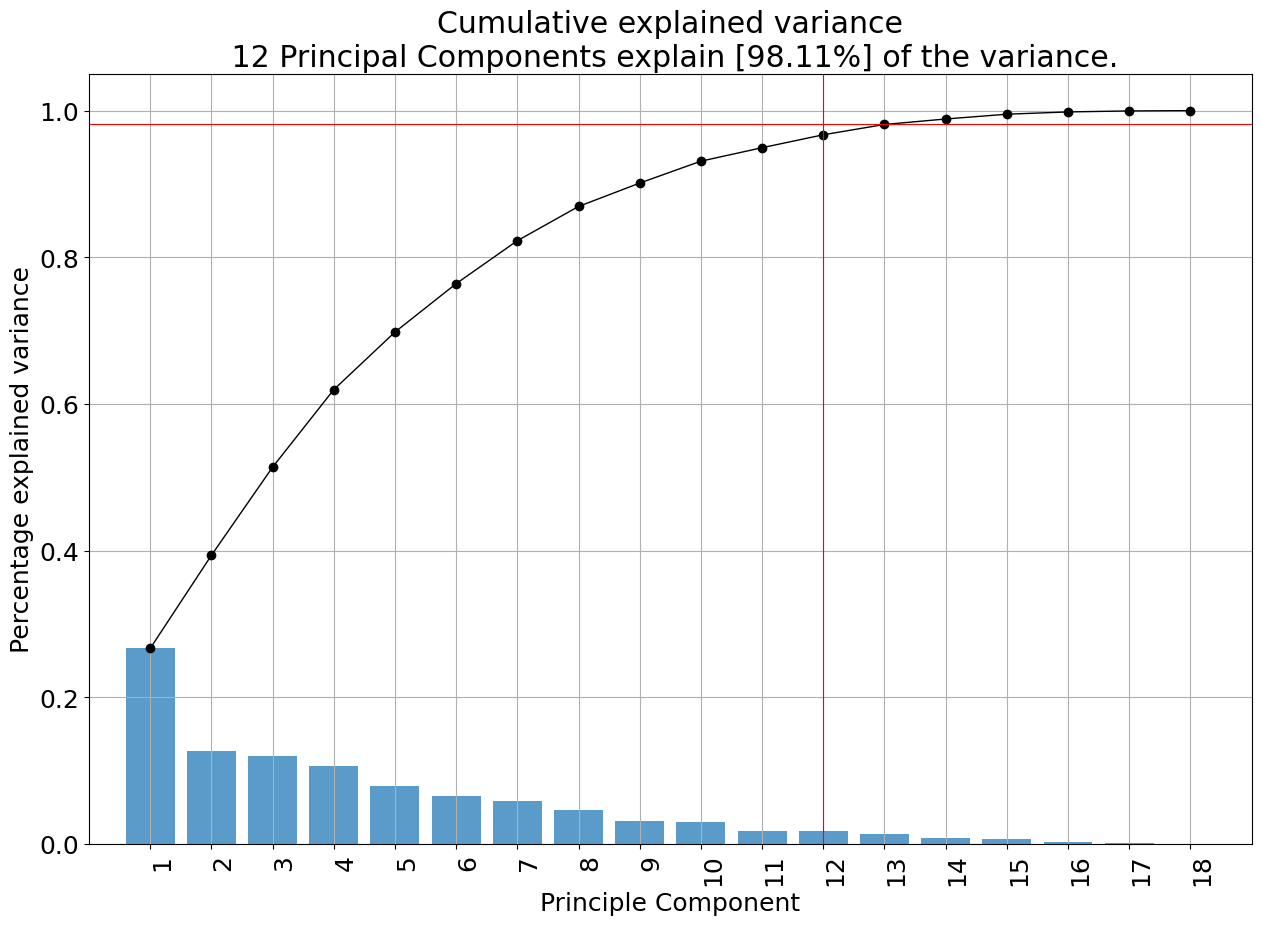

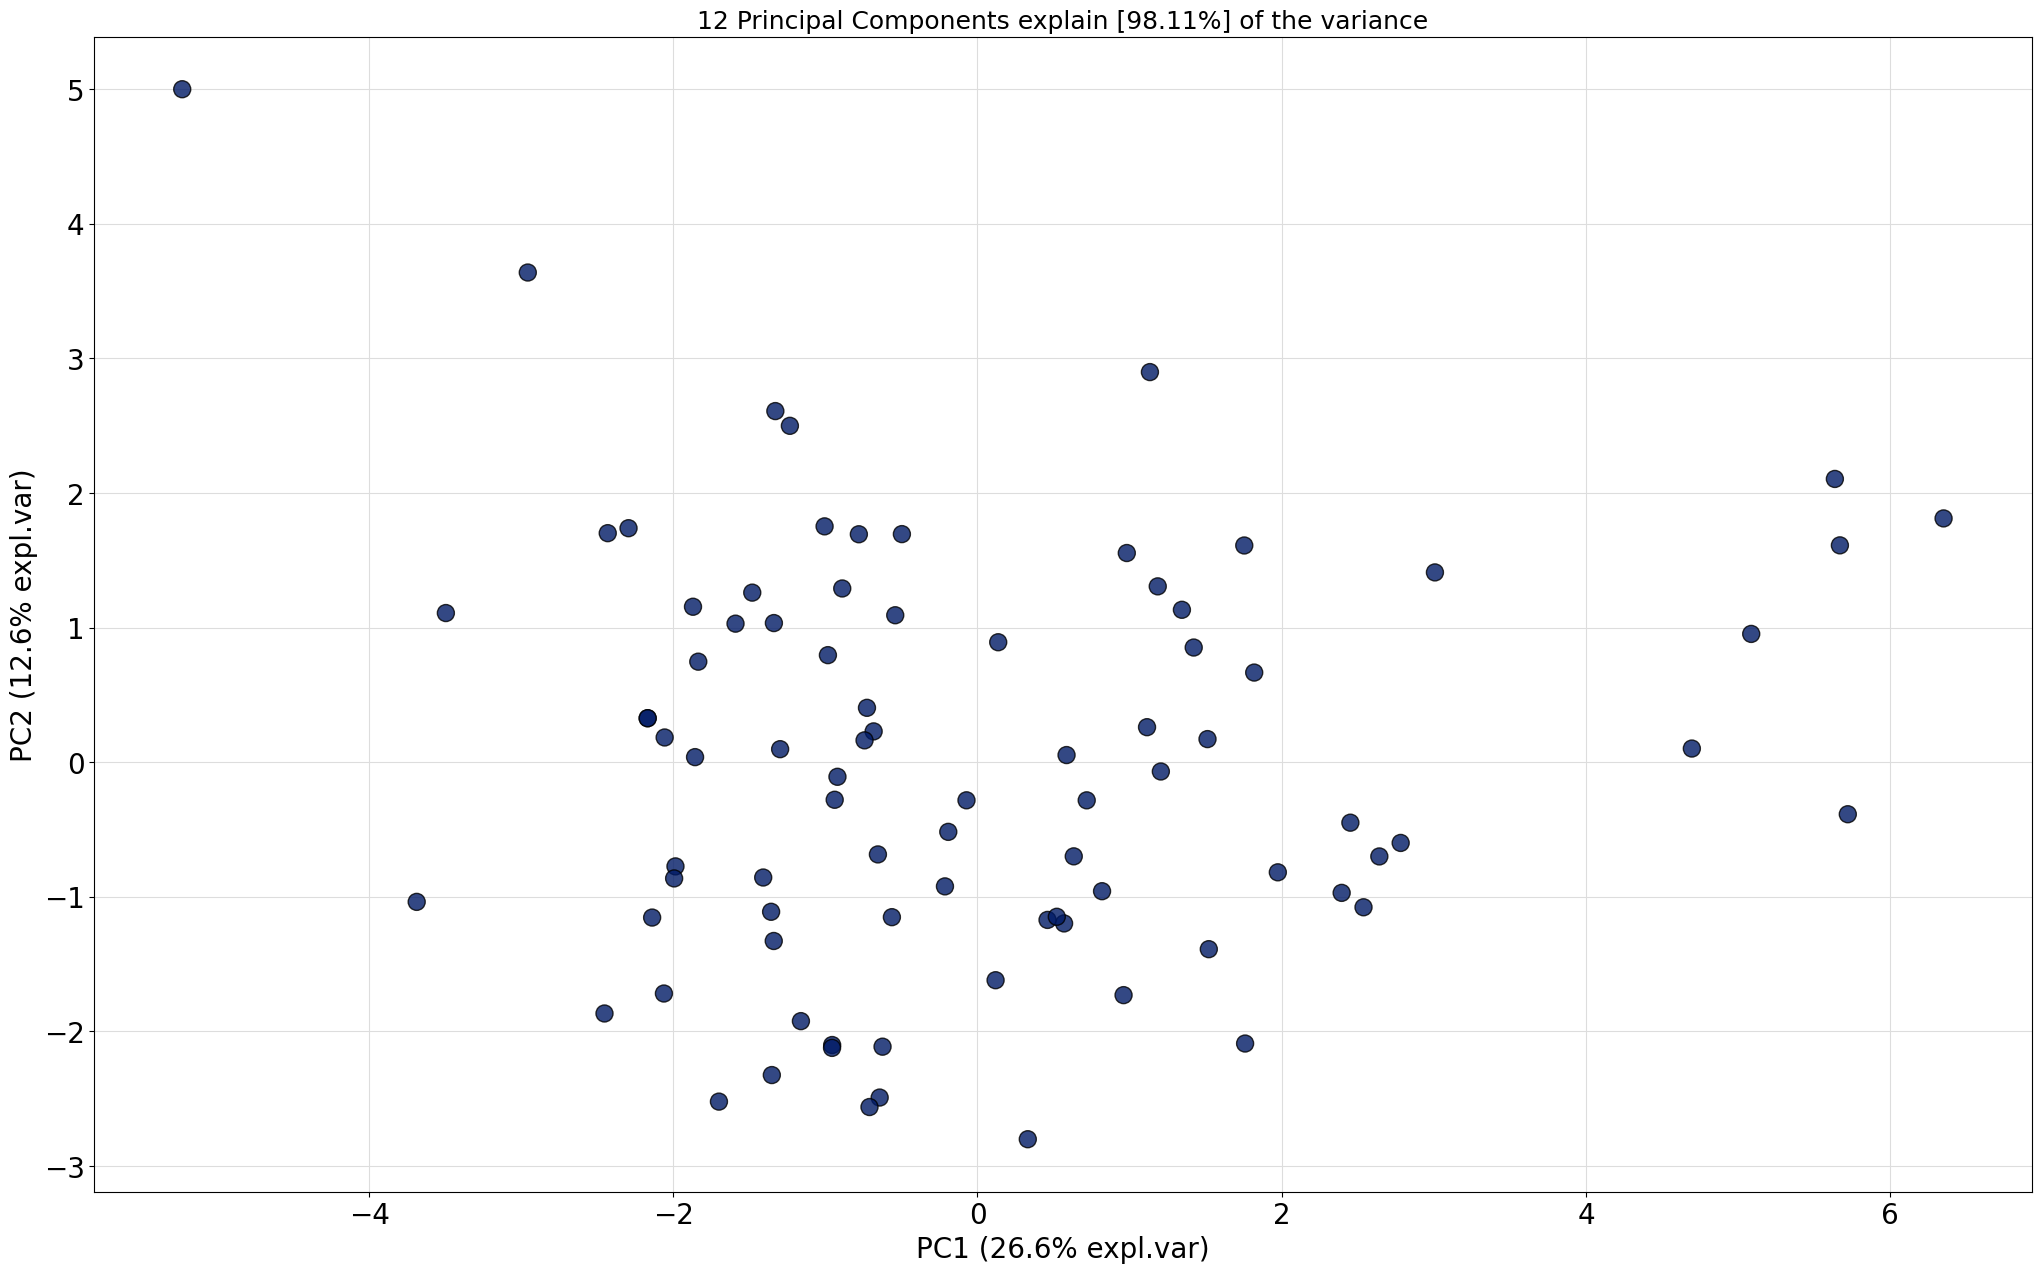

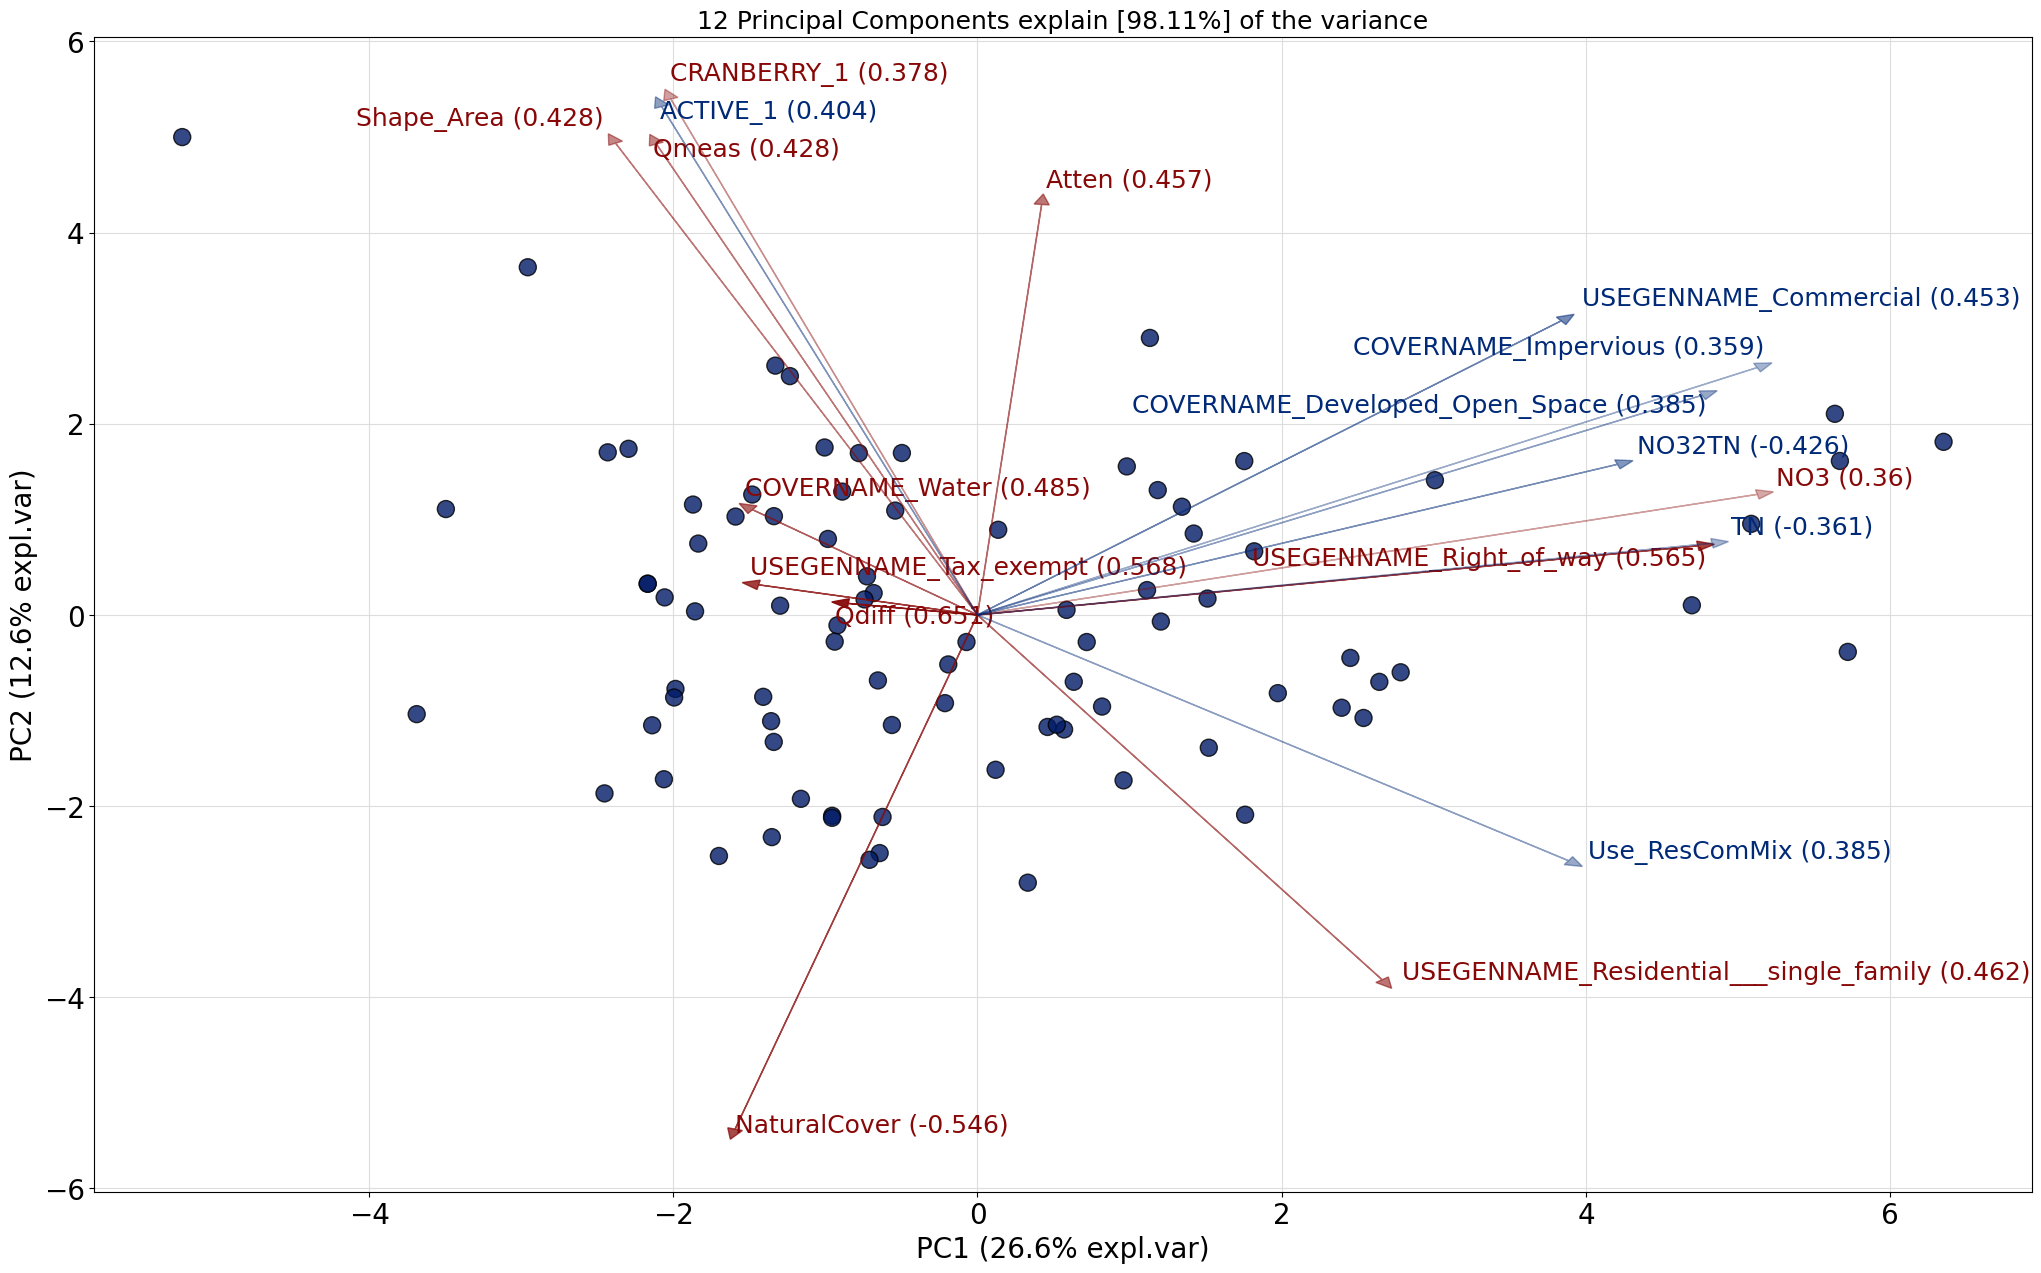

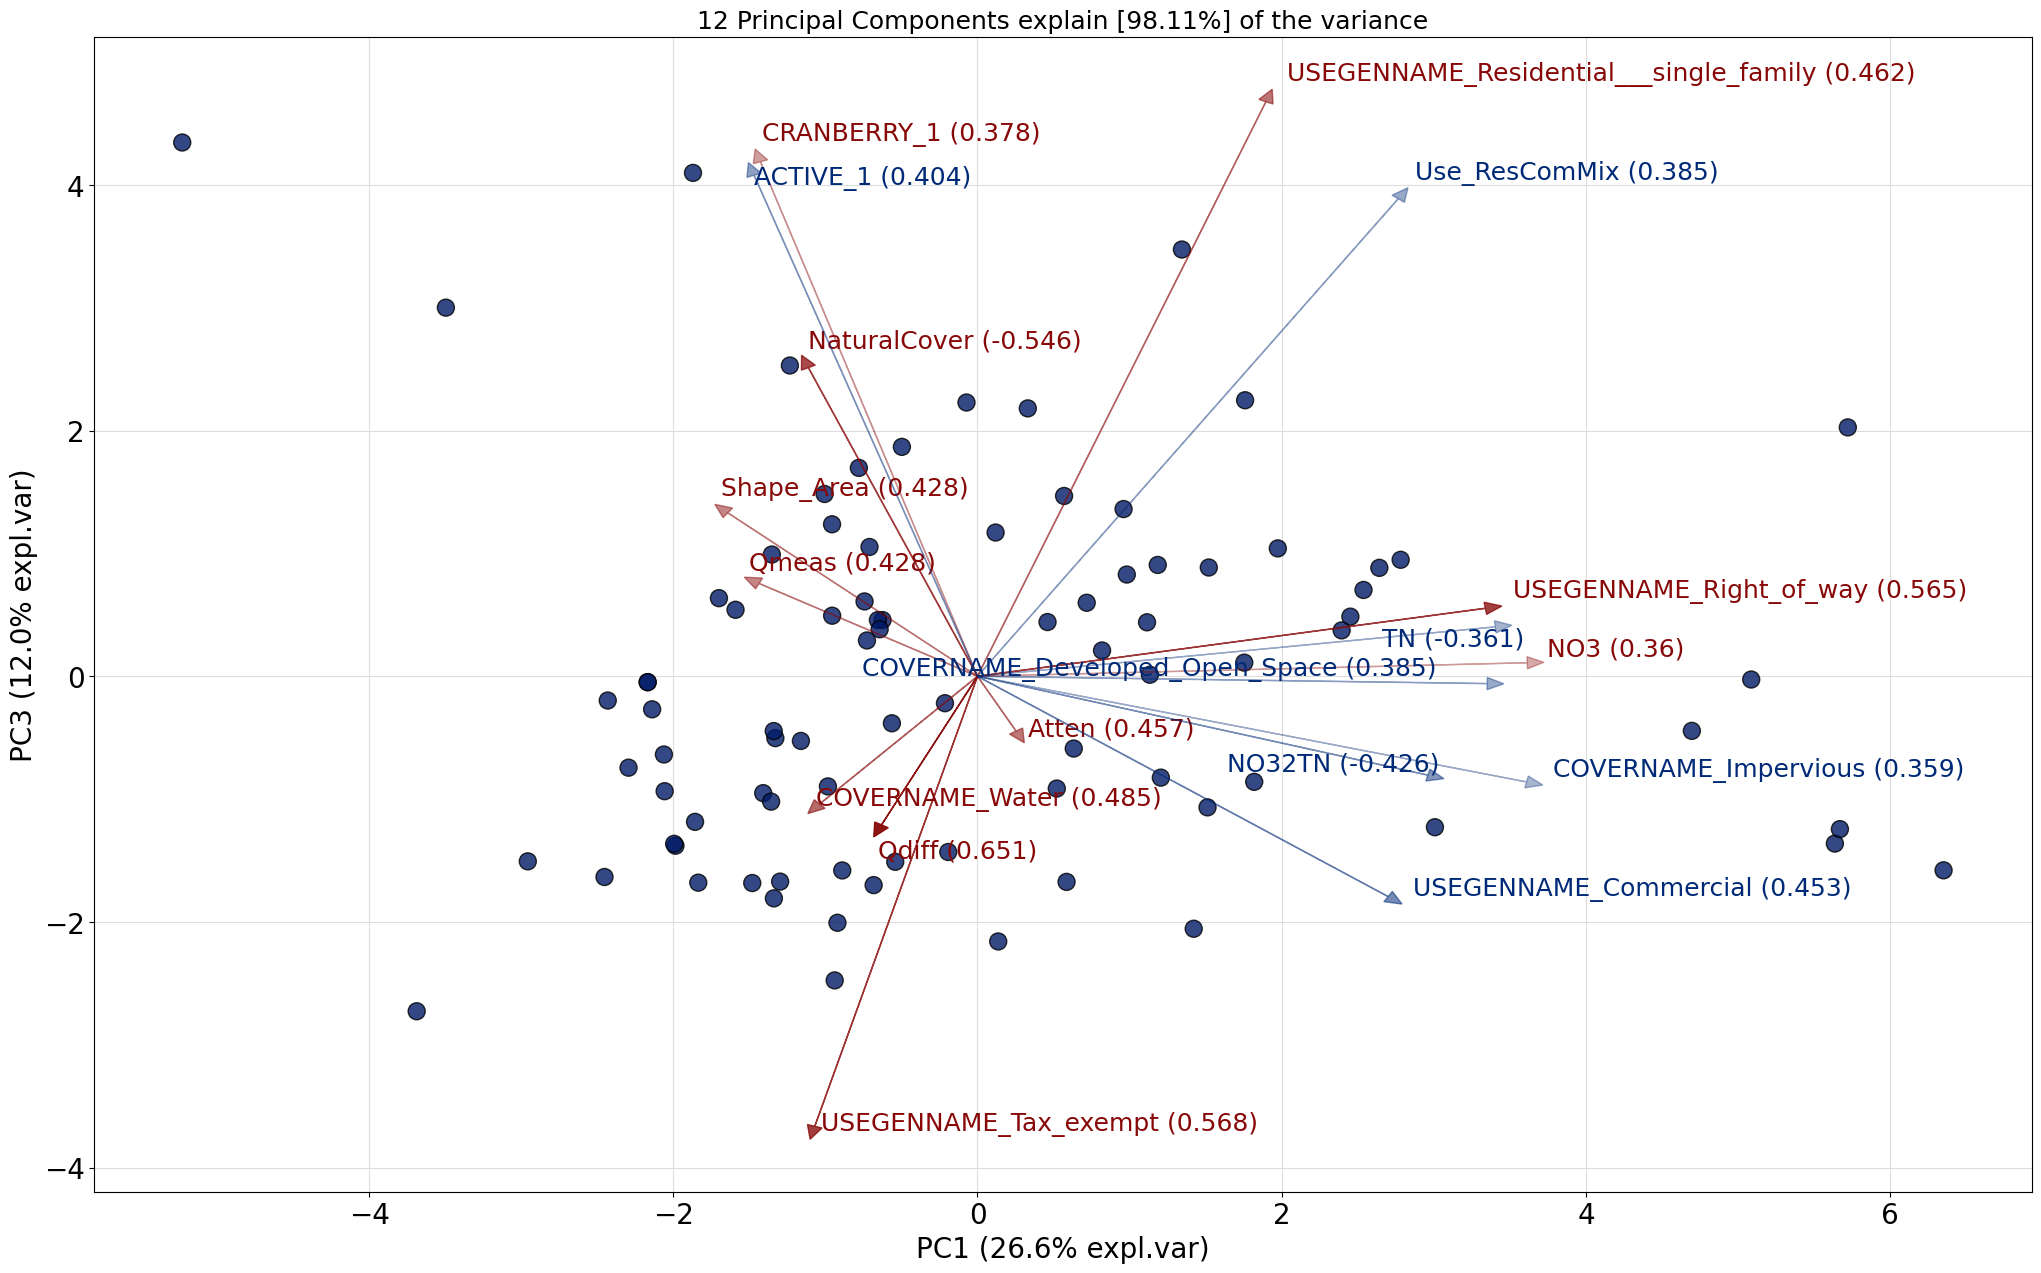

In [254]:
from pca import pca
import pandas as pd

###########################################################
# COMPUTE AND VISUALIZE PCA
###########################################################
# Initialize the PCA, either reduce the data to the number of
# principal components that explain 95% of the total variance...
model = pca(n_components=0.95) #pca(n_components=9)
# ... or explicitly specify the number of PCs
#model = pca(n_components=2)

# Fit and transform
results = model.fit_transform(X=X_scaled)

# Plot the explained variance
fig, ax = model.plot()

# Scatter the first two PCs
fig, ax = model.scatter()

# Create a biplot
fig, ax = model.biplot()

# Create a biplot
fig, ax = model.biplot(PC=[0,2])

In [ ]:
#### # COMPUTE AND VISUALIZE PCA
###########################################################
# Initialize the PCA, either reduce the data to the number of
# principal components that explain 95% of the total variance...
model = pca(n_components=0.95)
# ... or explicitly specify the number of PCs
#model = pca(n_components=2)

# Fit and transform
results = model.fit_transform(X=X)

# Plot the explained variance
fig, ax = model.plot()

# Scatter the first two PCs
fig, ax = model.scatter()

# Create a biplot
fig, ax = model.biplot()

In [ ]:
from sklearn.decomposition import PCA

features = X.names

In [ ]:
# standardization
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2).fit(X_scaled)
X_reduced = pca.transform(X_scaled)

# coordinates of samples (i.e., scores; let's take the first two axes)
scores = X_reduced[:, :2]

# coordinates of features (i.e., loadings; note the transpose)
loadings = pca.components_[:2].T

# proportions of variance explained by axes
pvars = pca.explained_variance_ratio_[:2] * 100

# arrows
arrows = loadings * np.abs(scores).max(axis=0)

In [ ]:
plt.figure(figsize=(5, 5))

# samples as points
#for i, name in enumerate(targets):
#    plt.scatter(*zip(*scores[y == i]), label=name)
#plt.legend(title='Species')

# empirical formula to determine arrow width
width = -0.0075 * np.min([np.subtract(*plt.xlim()), np.subtract(*plt.ylim())])

# features as arrows
for i, arrow in enumerate(arrows):
    plt.arrow(0, 0, *arrow, color='k', alpha=0.5, width=width, ec='none',
              length_includes_head=True)
    plt.text(*(arrow * 1.05), features[i],
             ha='center', va='center')

# axis labels
for i, axis in enumerate('xy'):
    getattr(plt, f'{axis}ticks')([])
    getattr(plt, f'{axis}label')(f'PC{i + 1} ({pvars[i]:.2f}%)')

# Appendix

## Unused code snippets

In [ ]:
# Creating histograms
vars = ["NOx2TN","TN","NOx",'Atten','Qdiff','Qmeas']
#var = vars[0]
#fig, axes = plt.subplots(2, 3, figsize = (20, 6))
for var in vars:
    sns.histplot(x=var,data=df_monitoring_avg)
    plt.show()

In [ ]:
sns.scatterplot(x='Use_ResComMix',y='NO3 (mg/L)',data=df)